## Introduction Of The Data

Bob has started his own mobile company. He wants to give a tough fight to big companies like
Apple, Samsung etc.
He does not know how to estimate the price of mobiles his company creates. In this competitive
mobile phone market, you cannot simply assume things. To solve this problem he collects sales data
of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory
etc) and its selling price. But he is not so good at Machine Learning. So he needs our help to solve
this problem.




## Objective of the model

Determine the price of the mobile based on its features. we do not have to predict the actual price but a price range indicating how high the
price is.


## Loading and Read The Data

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,recall_score,precision_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
import joblib

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets_11167_15520_train..csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

## About the dataset

This dataset contains 2000 records of features contains the target column which is divided into four classes:
value of.
- 0(low cost)
- 1(medium cost)
- 2(high cost)
- 3(very high cost)

### Columns description:


- battery_power: Total energy a battery can store in one time measured in mAh

- blue: Has bluetooth or not

- clock_speed: speed at which microprocessor executes instructions

- dual_sim: Has dual sim support or not

- fc: Front Camera mega pixels

- four_g: Has 4G or not

- int_memory: Internal Memory in Gigabytes

- m_dep: Mobile Depth in cm

- mobile_wt: Weight of mobile phone

- n_cores: Number of cores of processor

- pc: Primary Camera mega pixels

- px_height: Pixel Resolution Height

- px_width: Pixel Resolution Width

- ram: Random Access Memory in Megabytes

- sc_h: Screen Height of mobile in cm

- sc_w: Screen Width of mobile in cm

- talk_time: longest time that a single battery charge will last when you are

- three_g: Has 3G or not

- touch_screen: Has touch screen or not

- wifi: Has wifi or not

#### The Target

- price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

### Describing the dataframe:

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


There are ordinal categorical columns in the dataset:

1. dual_sim
2. blue
3. three_g
4. four_g
5. wifi
6. price_range
7. touch_screen

### Deal with Nulla Data

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values so we don't have to perform the drop null values step.

In [8]:
df.shape

(2000, 21)

### Deal with Duplicated Values

In [9]:
df.duplicated().sum()

0

There are no duplicate values in our data set.

## Exploratory Data Analysis (EDA)

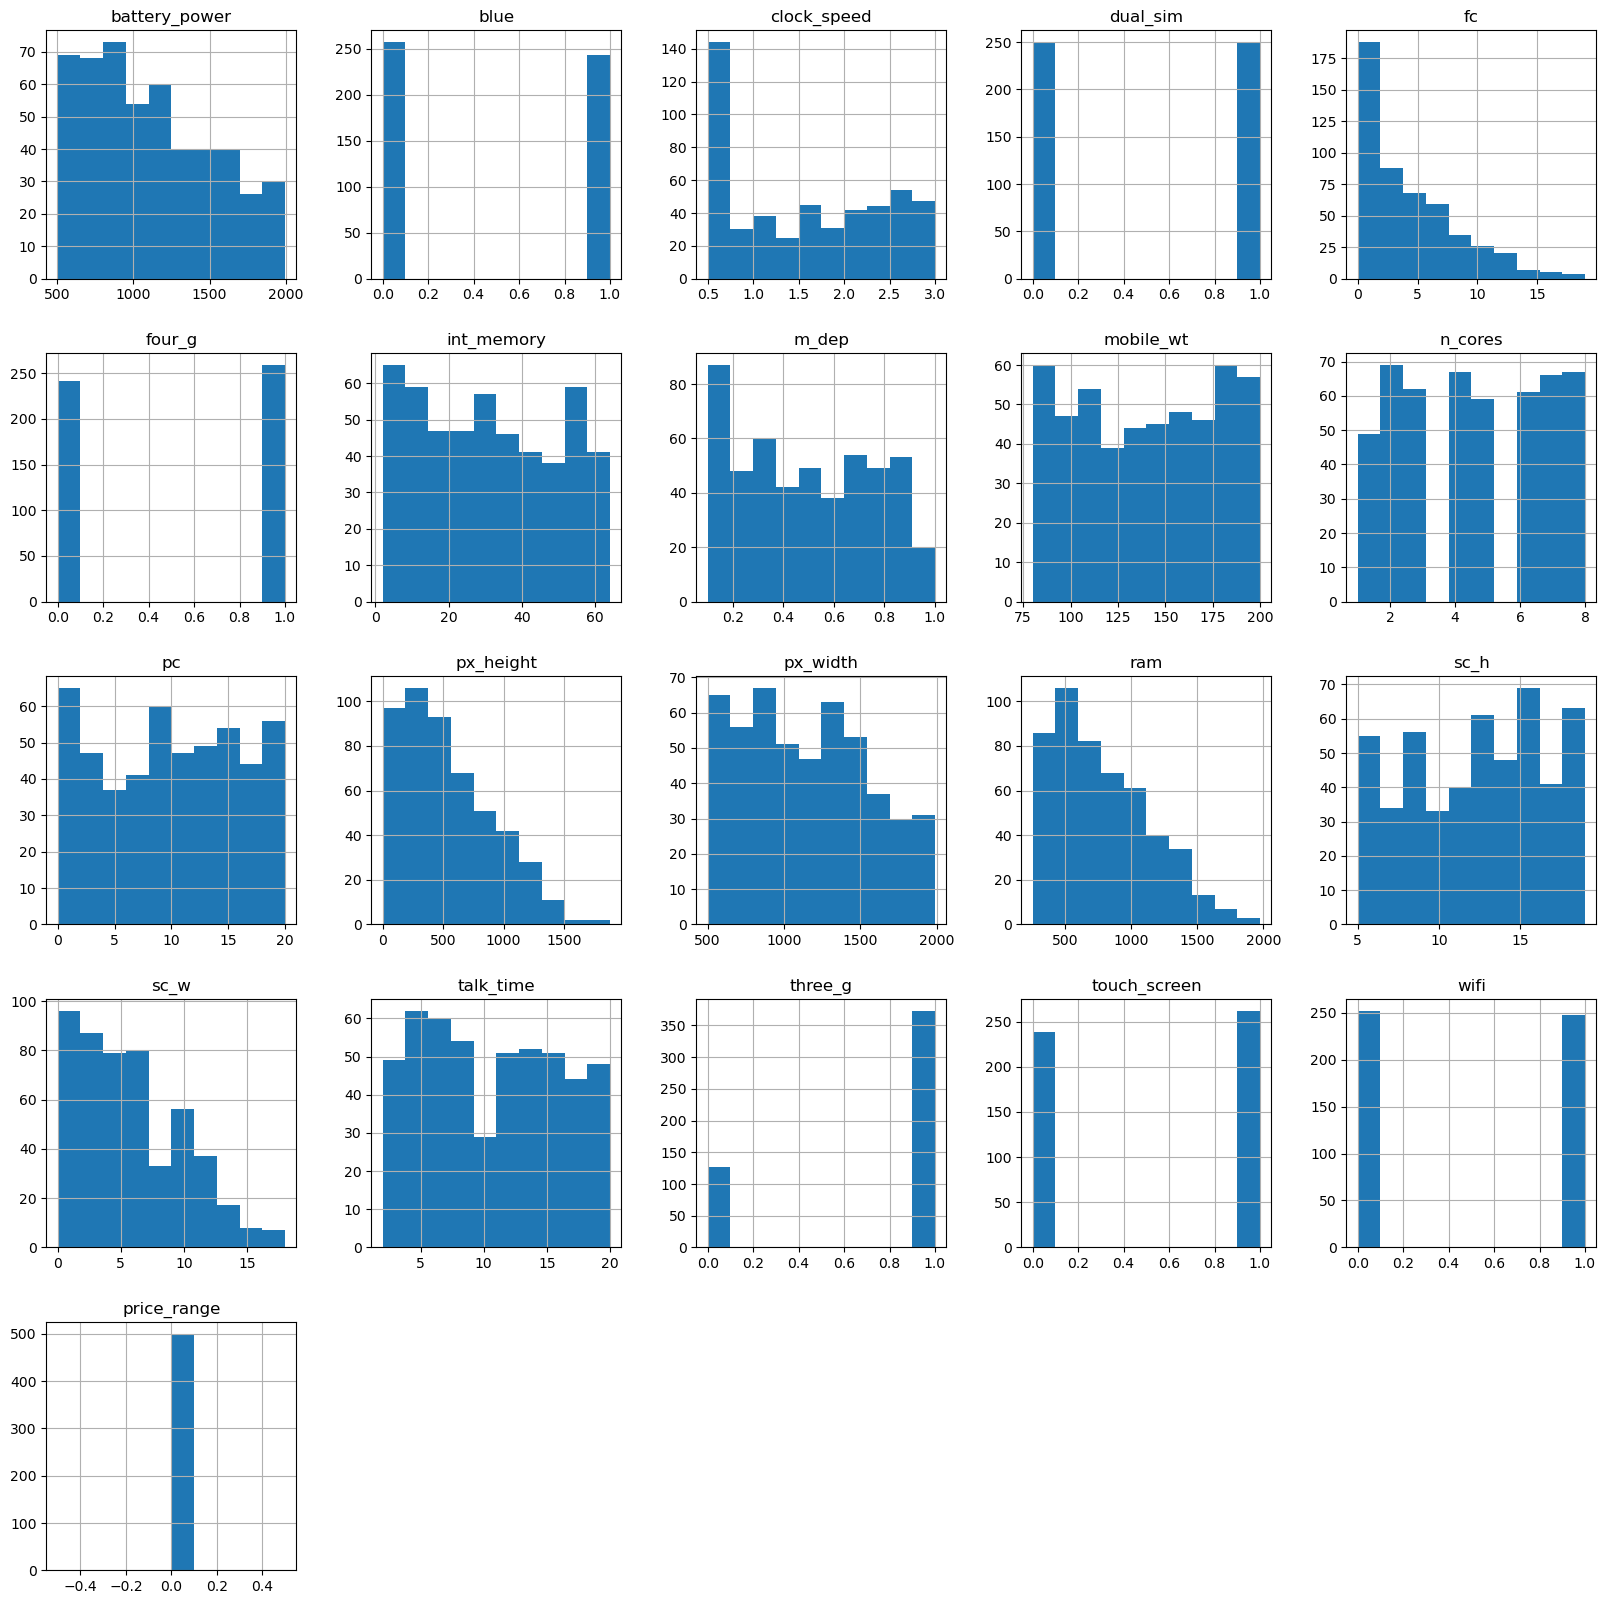

In [10]:
df[df['price_range']==0].hist(figsize=(20,20))
plt.show()

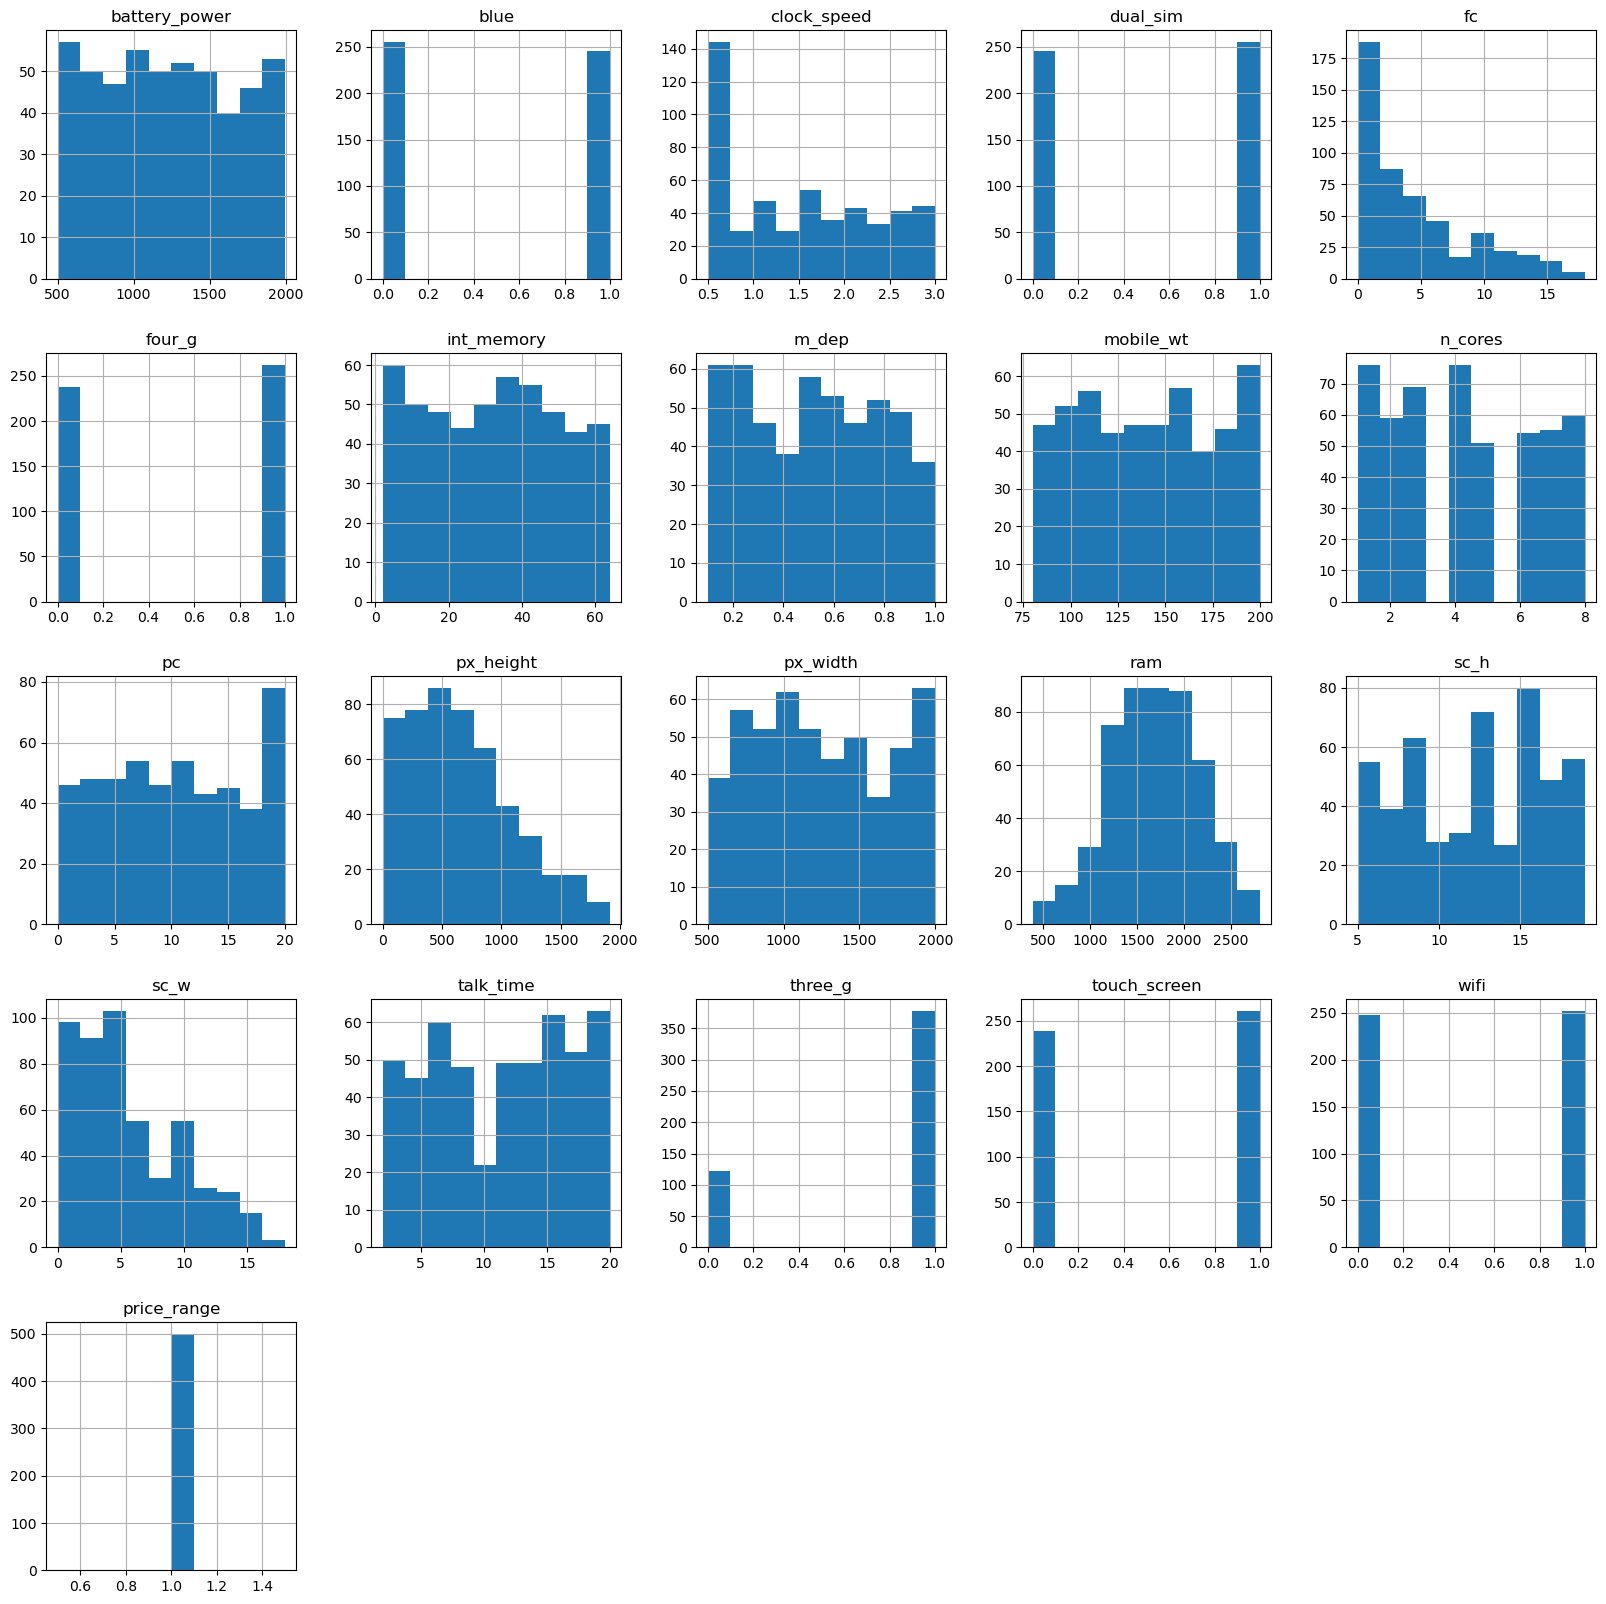

In [11]:
df[df['price_range']==1].hist(figsize=(20,20))
plt.show()

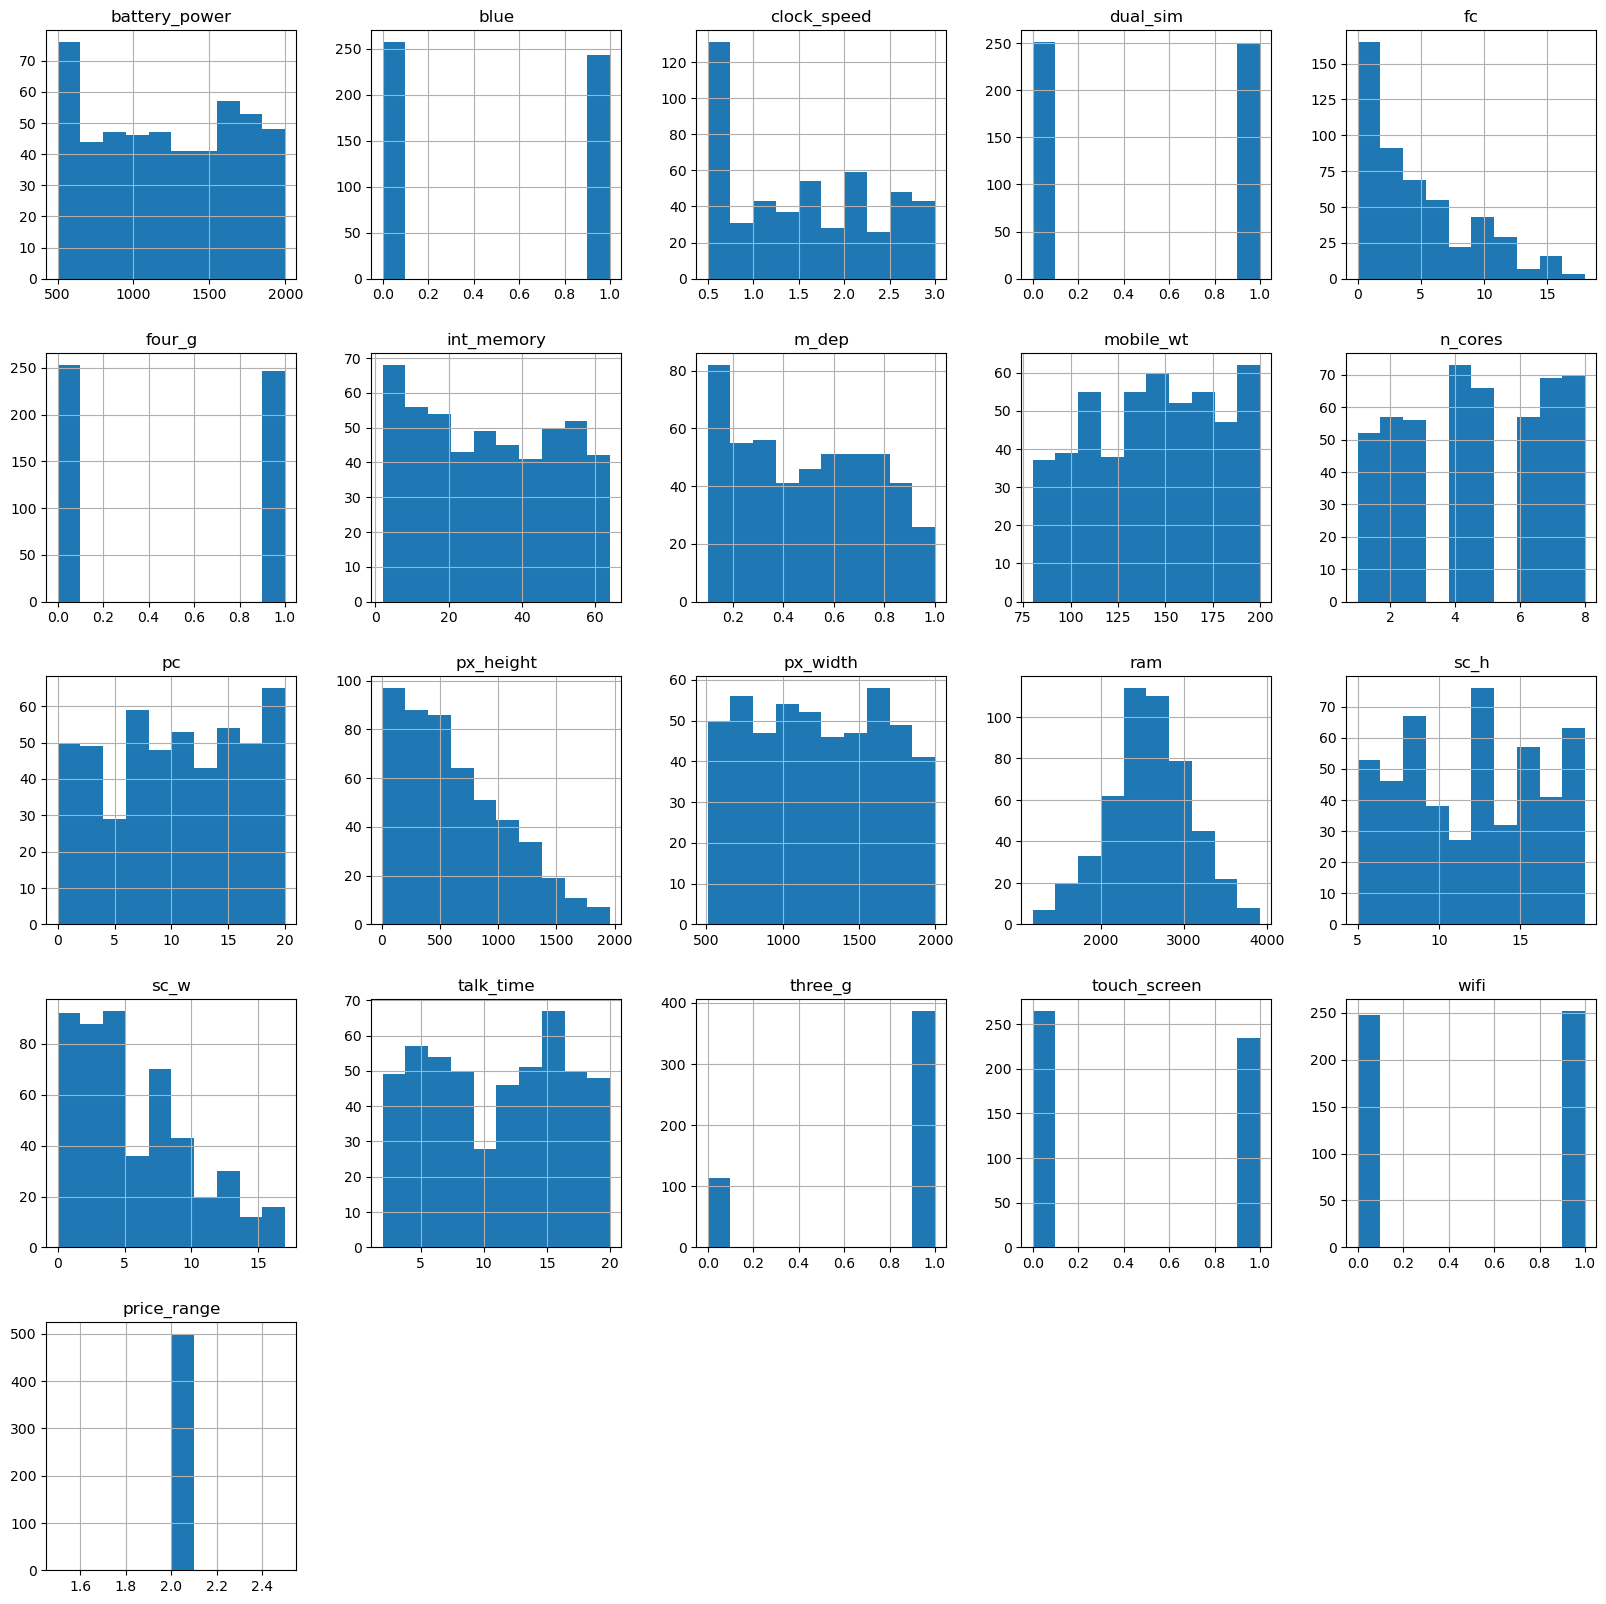

In [12]:
df[df['price_range']==2].hist(figsize=(20,20))
plt.show()

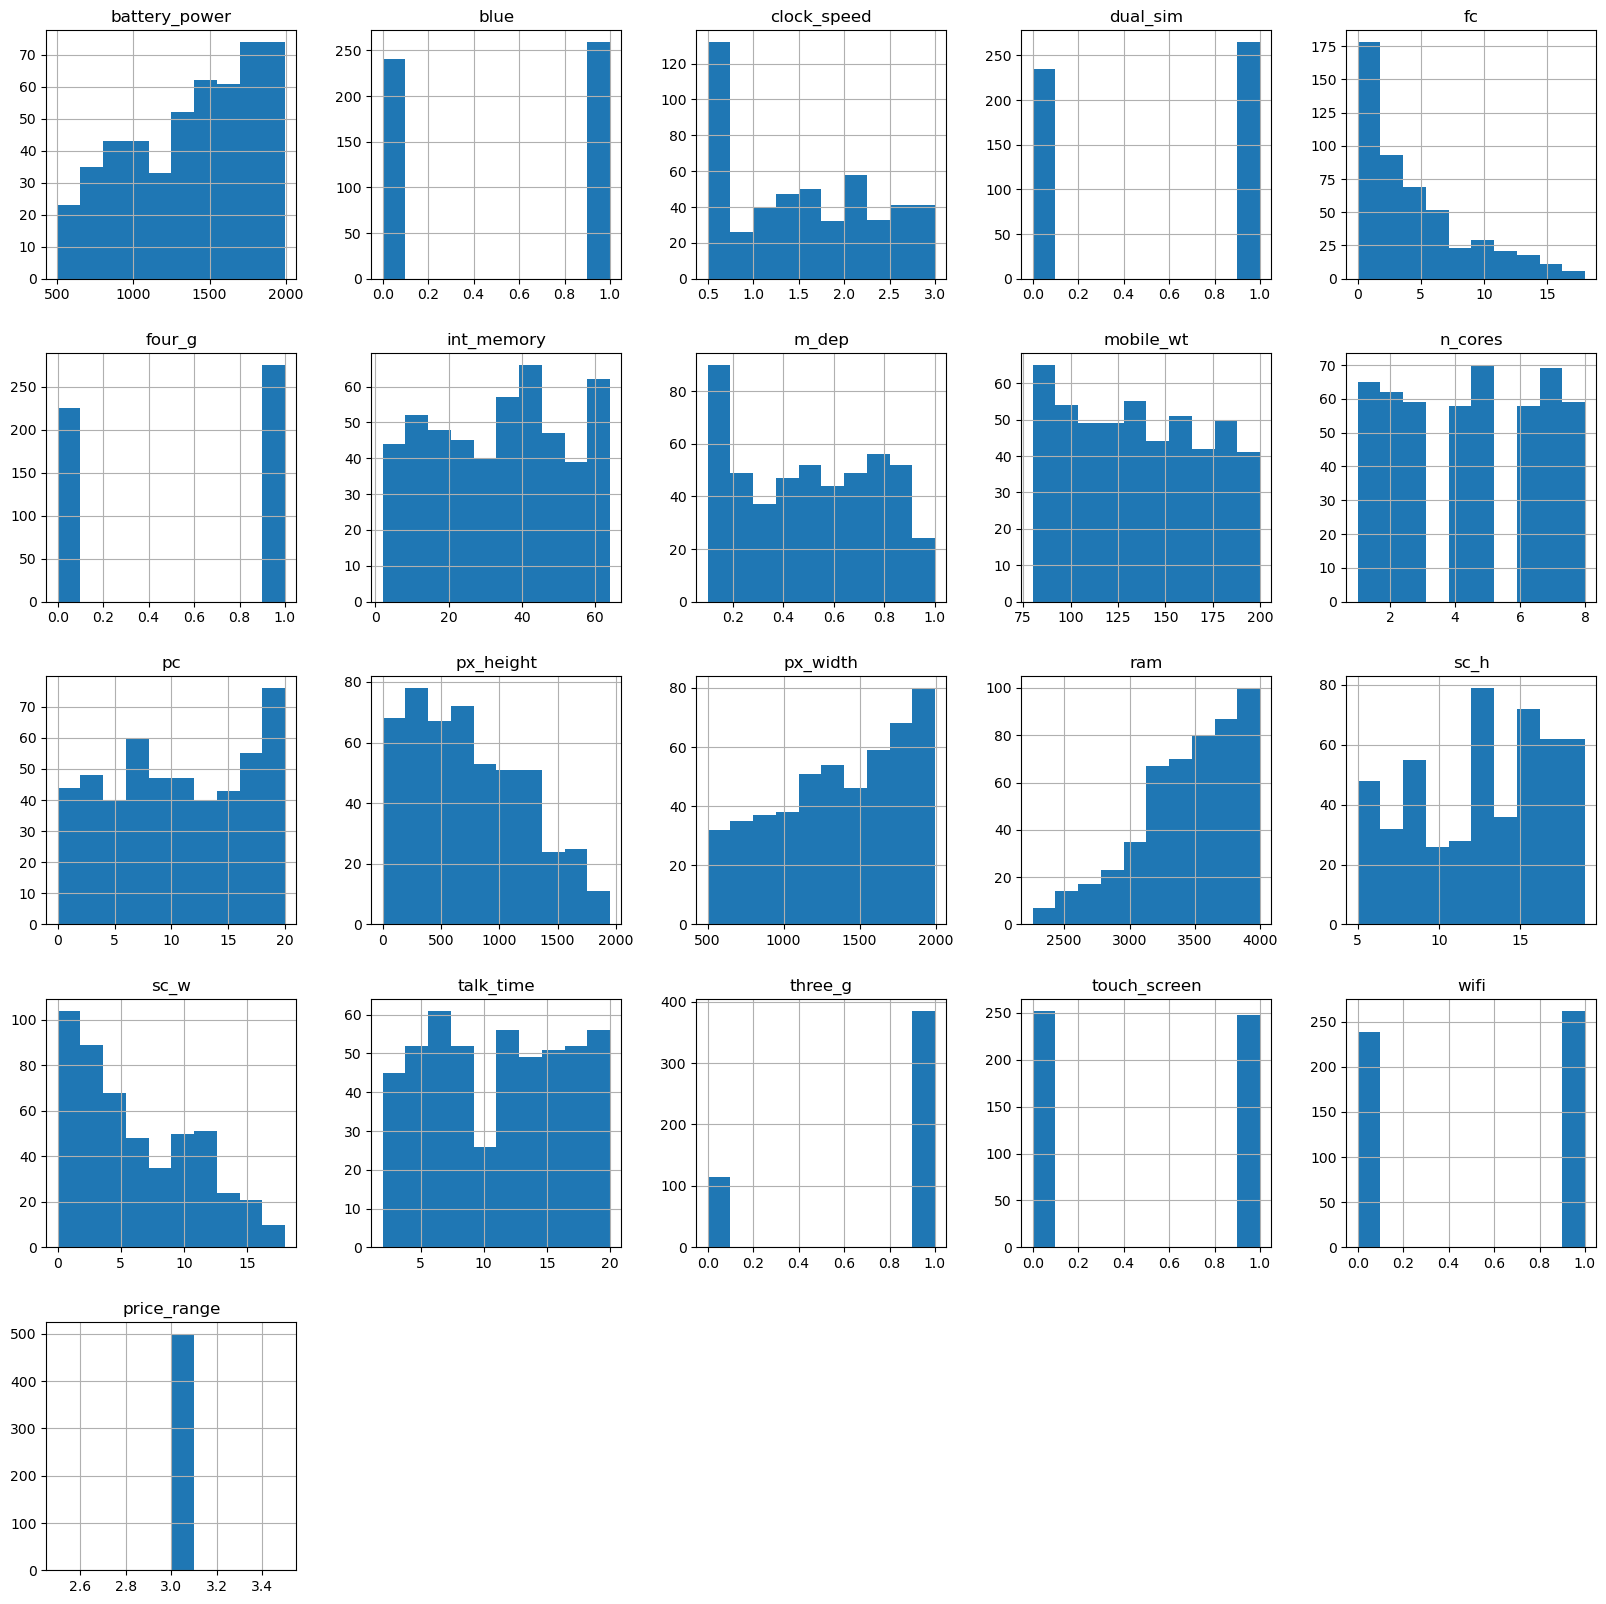

In [13]:
df[df['price_range']==3].hist(figsize=(20,20))
plt.show()

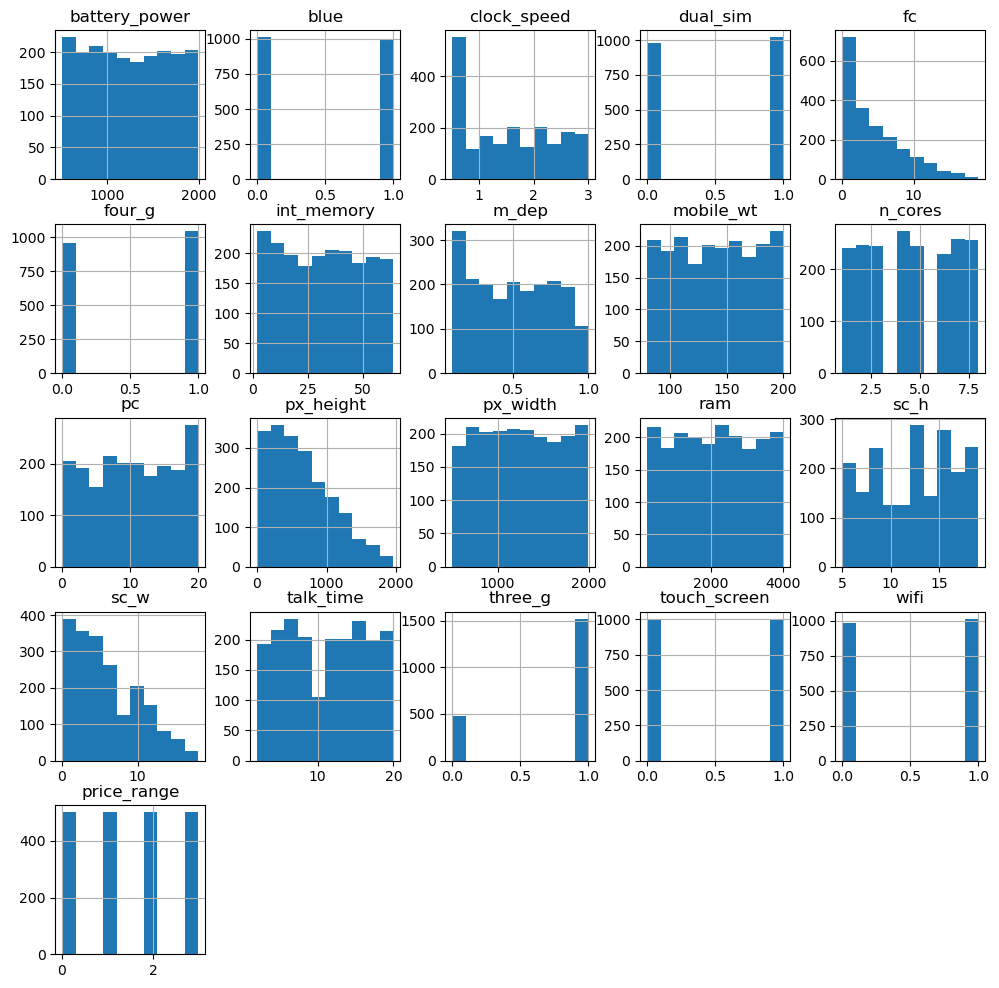

In [14]:
df.hist(figsize=(12,12))
plt.show()

In [15]:
cat_cols = df[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']]
num_cols = df[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc', 'px_height','px_width','ram','sc_h','sc_w','talk_time']]
target ='price_range'

## Univariate Plots

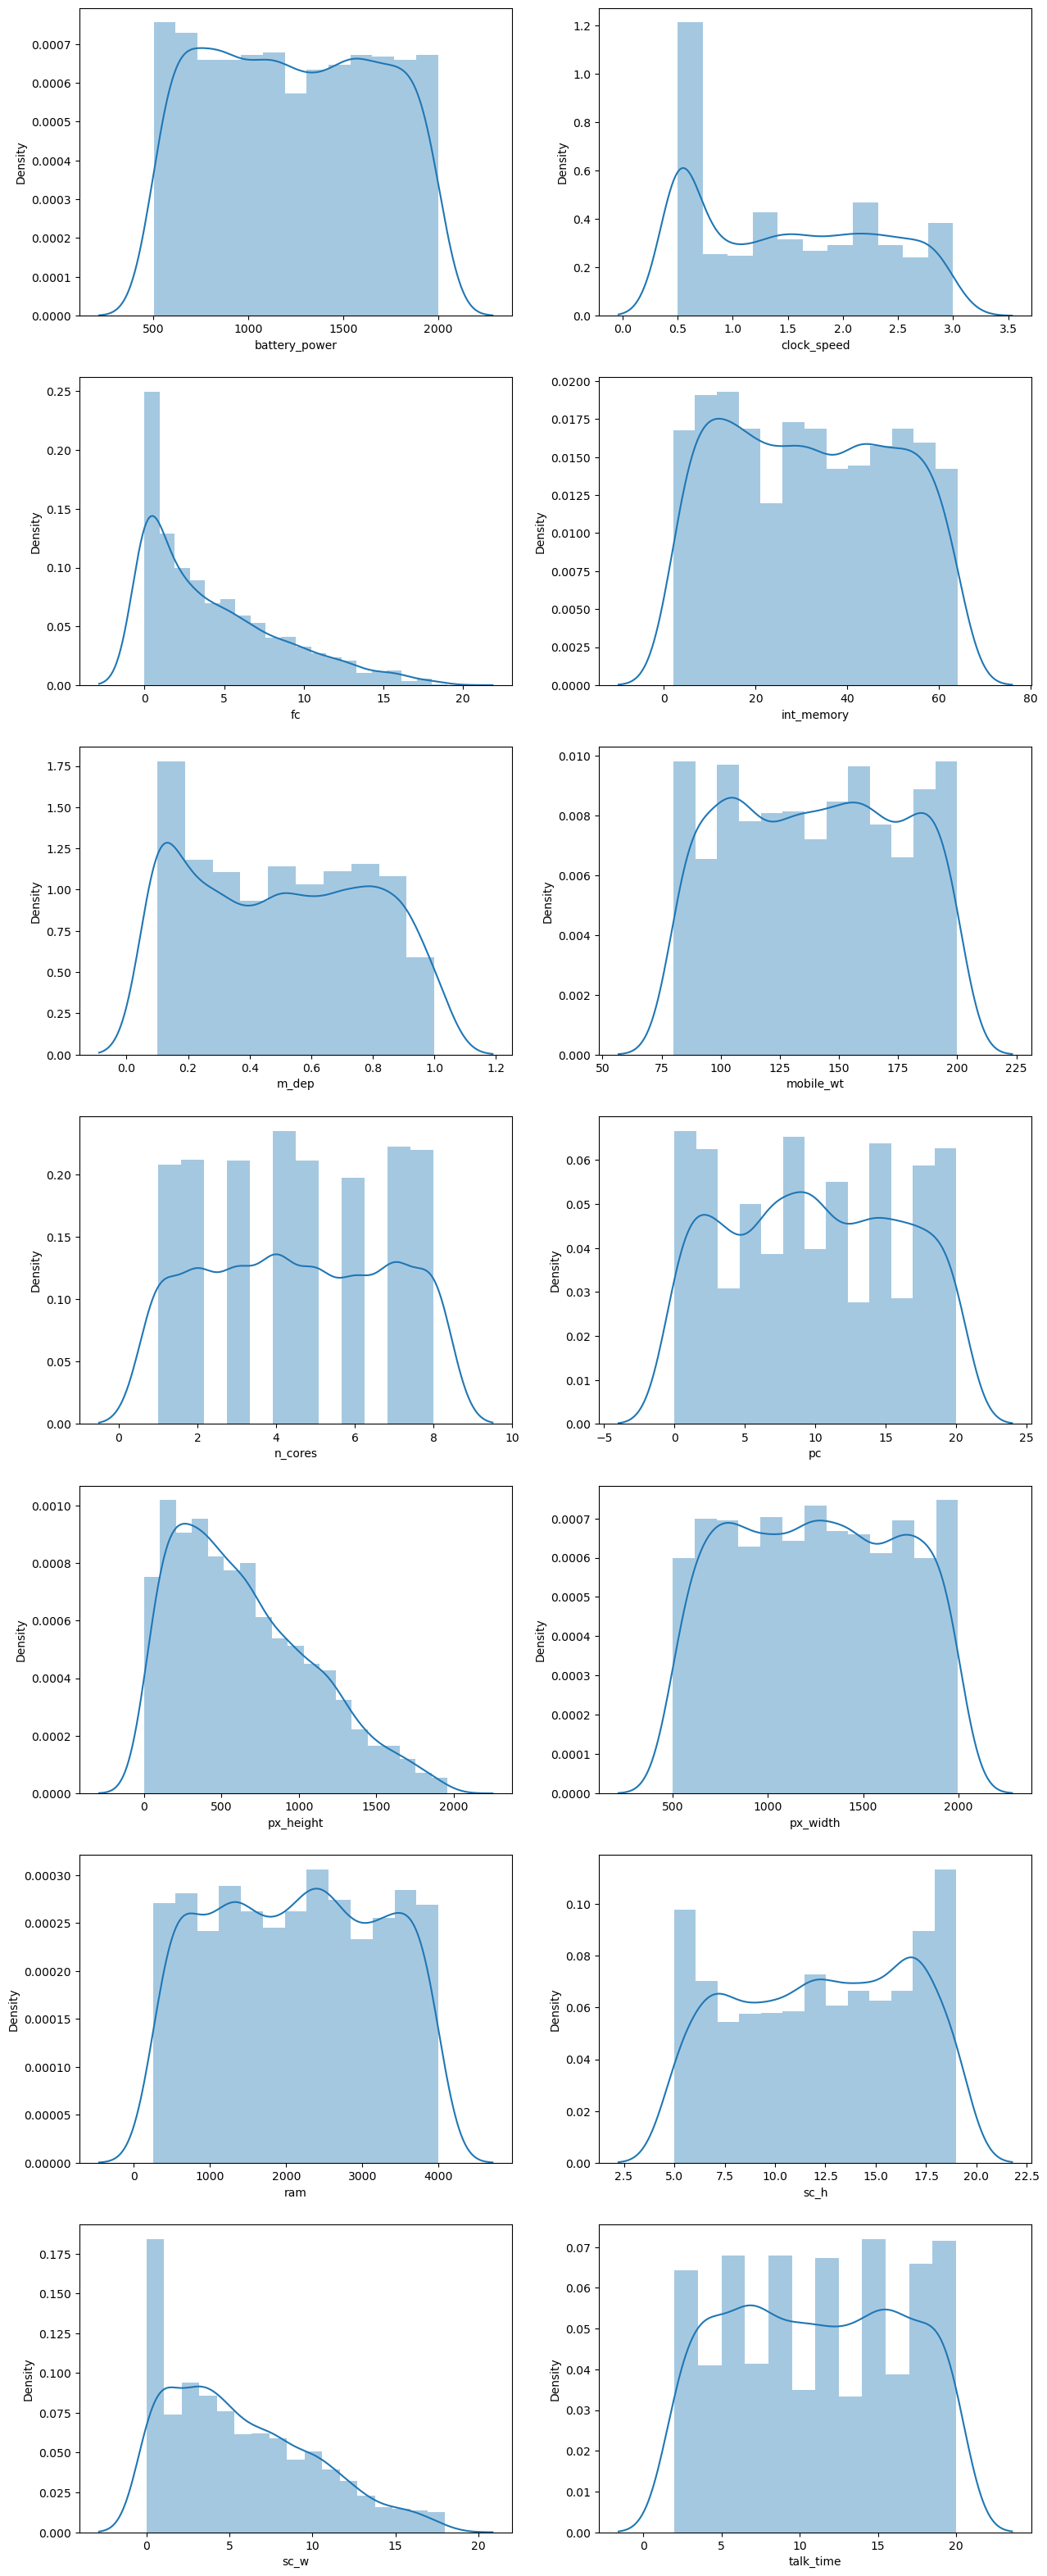

In [16]:
fig,axes = plt.subplots(nrows=7,ncols=2,figsize=(15,40))
for i ,column in enumerate(num_cols.columns):
    sns.distplot(num_cols[column],ax=axes.flatten()[i])

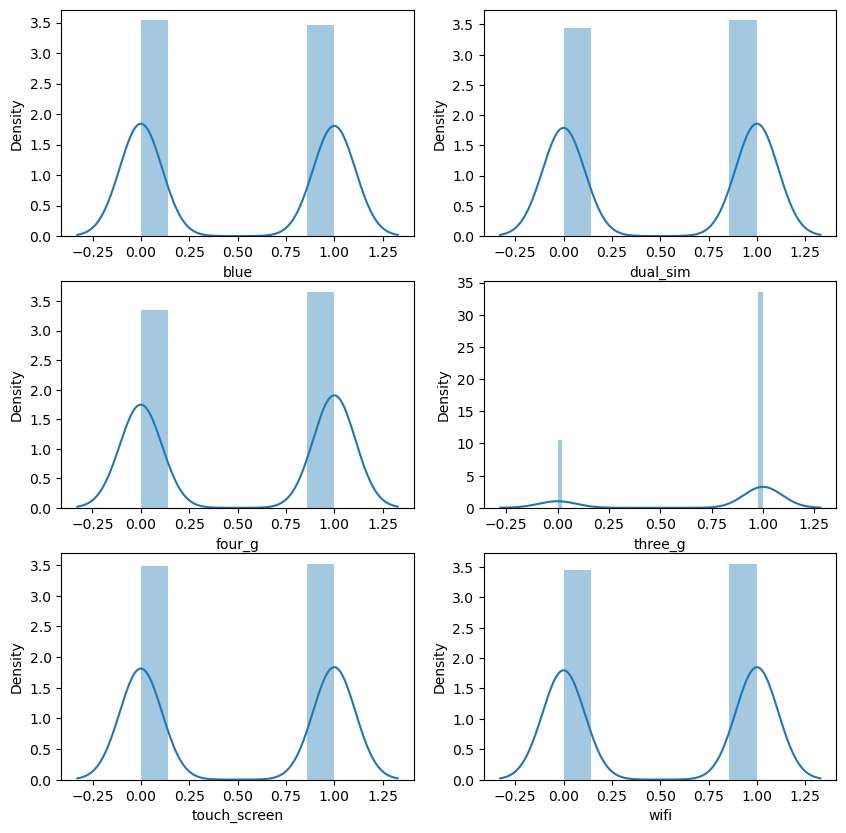

In [17]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
for i ,column in enumerate(cat_cols.columns):
    sns.distplot(cat_cols[column],ax=axes.flatten()[i])

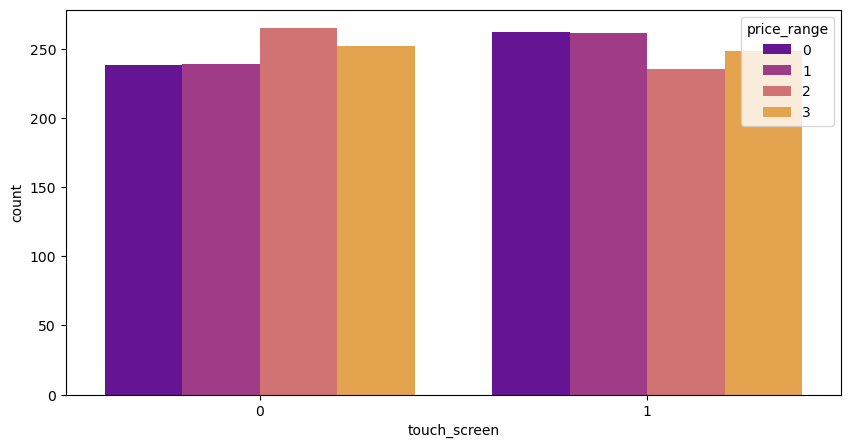

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.touch_screen,hue=df.price_range,palette='plasma')
plt.show()

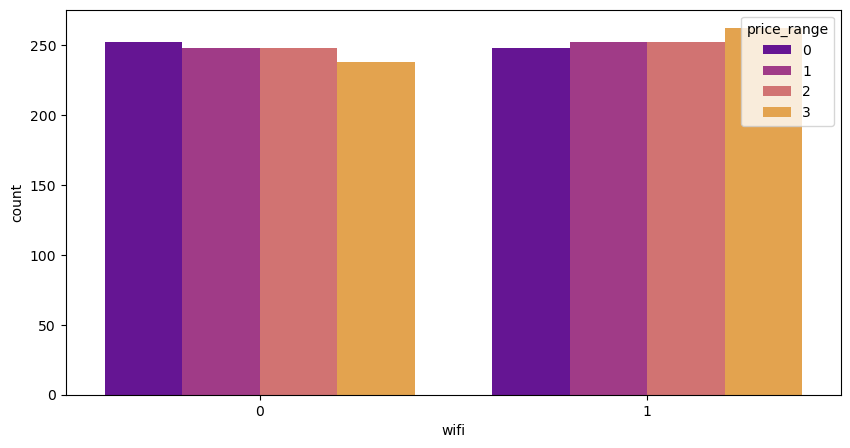

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.wifi,hue=df.price_range,palette='plasma')
plt.show()

In [20]:
def cat_plots(feature, data):
    _, ax = plt.subplots(1, 2, figsize=(10, 4))
    data[feature].value_counts().plot(kind="pie", explode=[0.07 for _ in data[feature].dropna().unique()], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(f"{feature} Pie Chart")
    ax[0].set_ylabel('')

    count = sns.countplot(x=feature, data=data, ax=ax[1])
    for bar in count.patches:
        count.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=11, xytext=(0, 8),
            textcoords='offset points')
    ax[1].set_title(f"{feature} Bar Chart")
    plt.show()

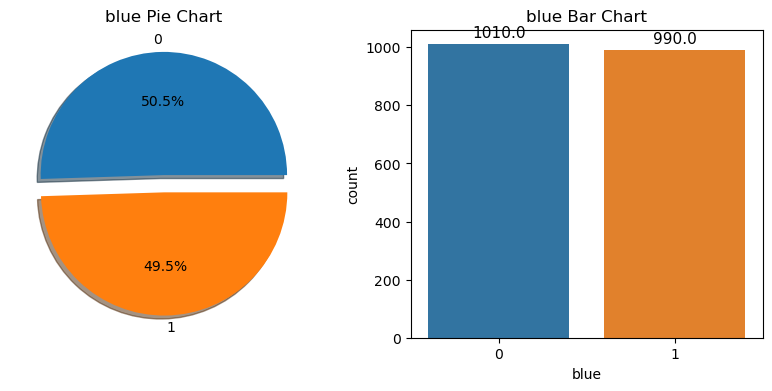

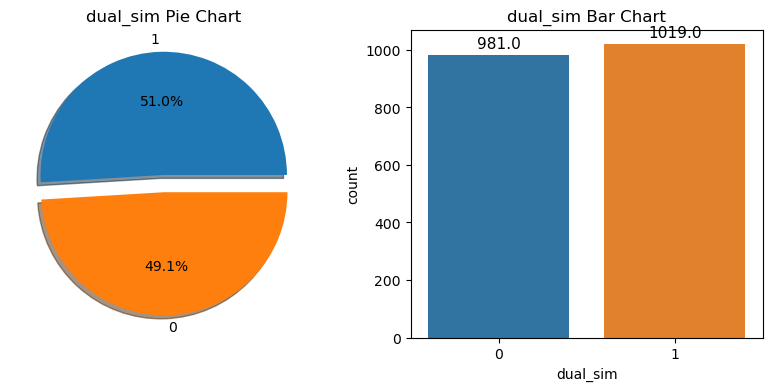

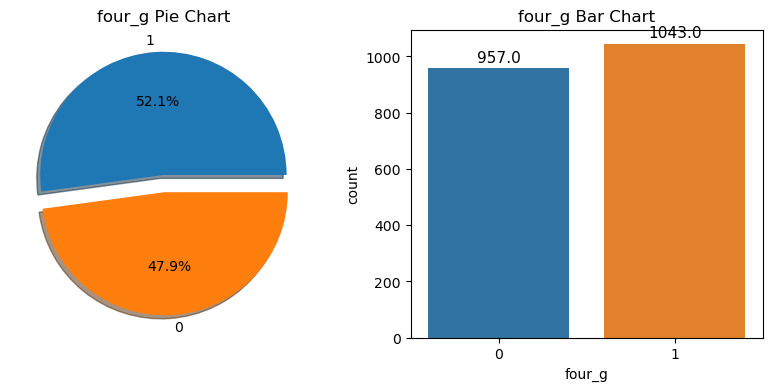

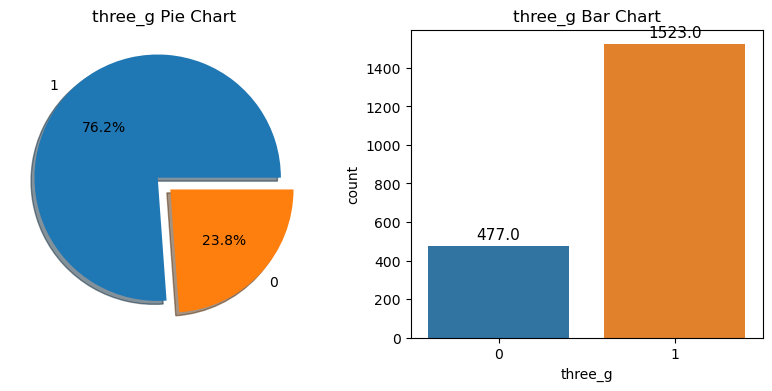

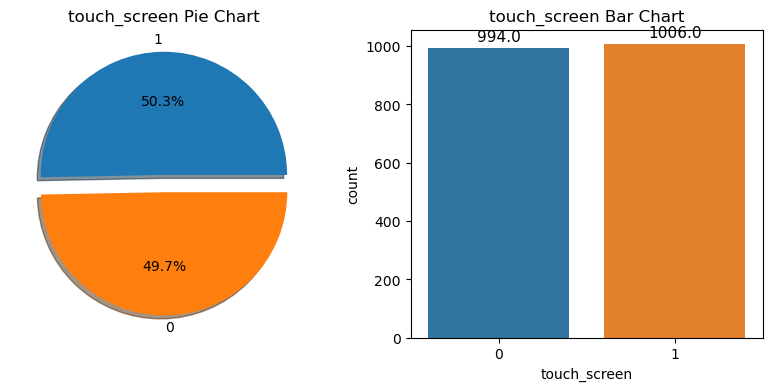

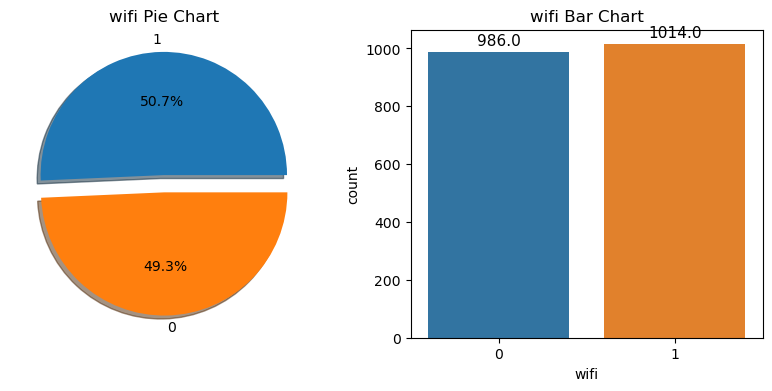

In [21]:
for col in cat_cols:
    cat_plots(col,df)

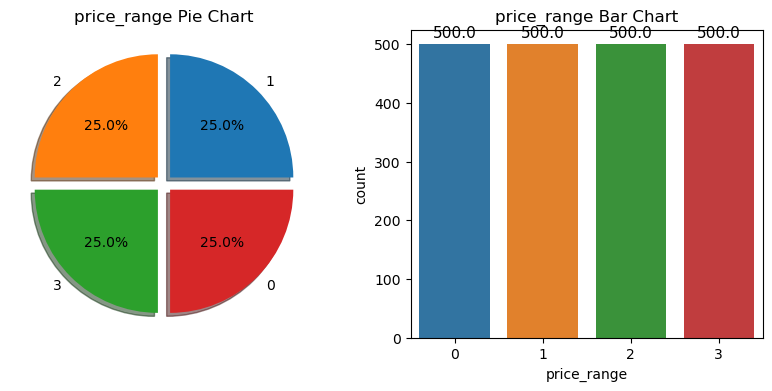

In [22]:
cat_plots(target, df)

## Observations:

#### - Our target variable has equal number of observations in each category. Target variable is equally distributed.
#### - Percentage distribution of Mobiles having bluetooth,dual sim,4G, wifi and touch screen are almost 50%.
#### - Very few mobiles(23.8%) do not have 3G.

## Bivariate And Multivariate Analysis

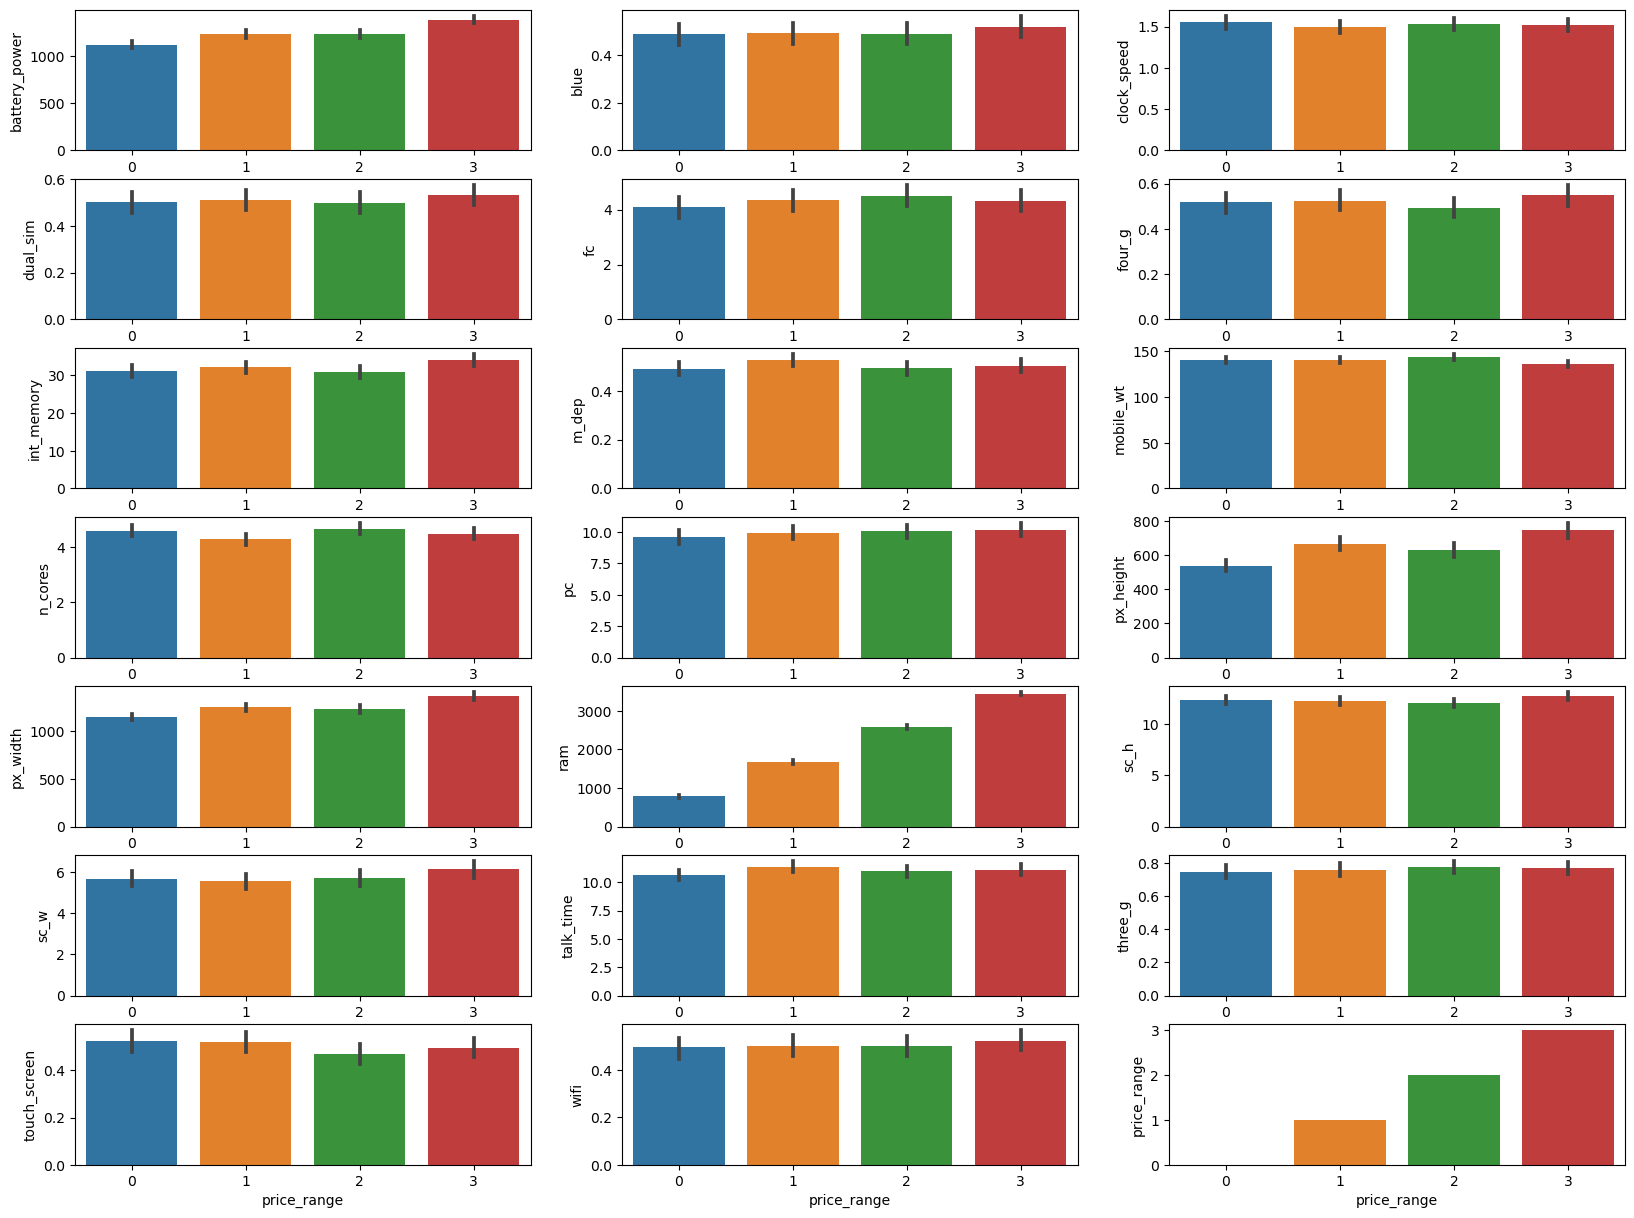

In [23]:
fig,axes = plt.subplots(nrows=7,ncols=3,figsize = (20,15))
for i,column in enumerate(df.columns):
    sns.barplot(x='price_range',y=column,data=df,ax=axes[i//3,i%3])

## Observations:

 ##### - Mobiles having RAM more than 3000MB falls under Very high cost category. As RAM increases price range also increases.
##### - Mobiles having RAM less than 1000MB falls under low cost category.
##### - Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAh 
  ##### falls under medium and high cost category.
##### - Mobiles with more than 700 pixel height and width more than 1300 has very high cost.

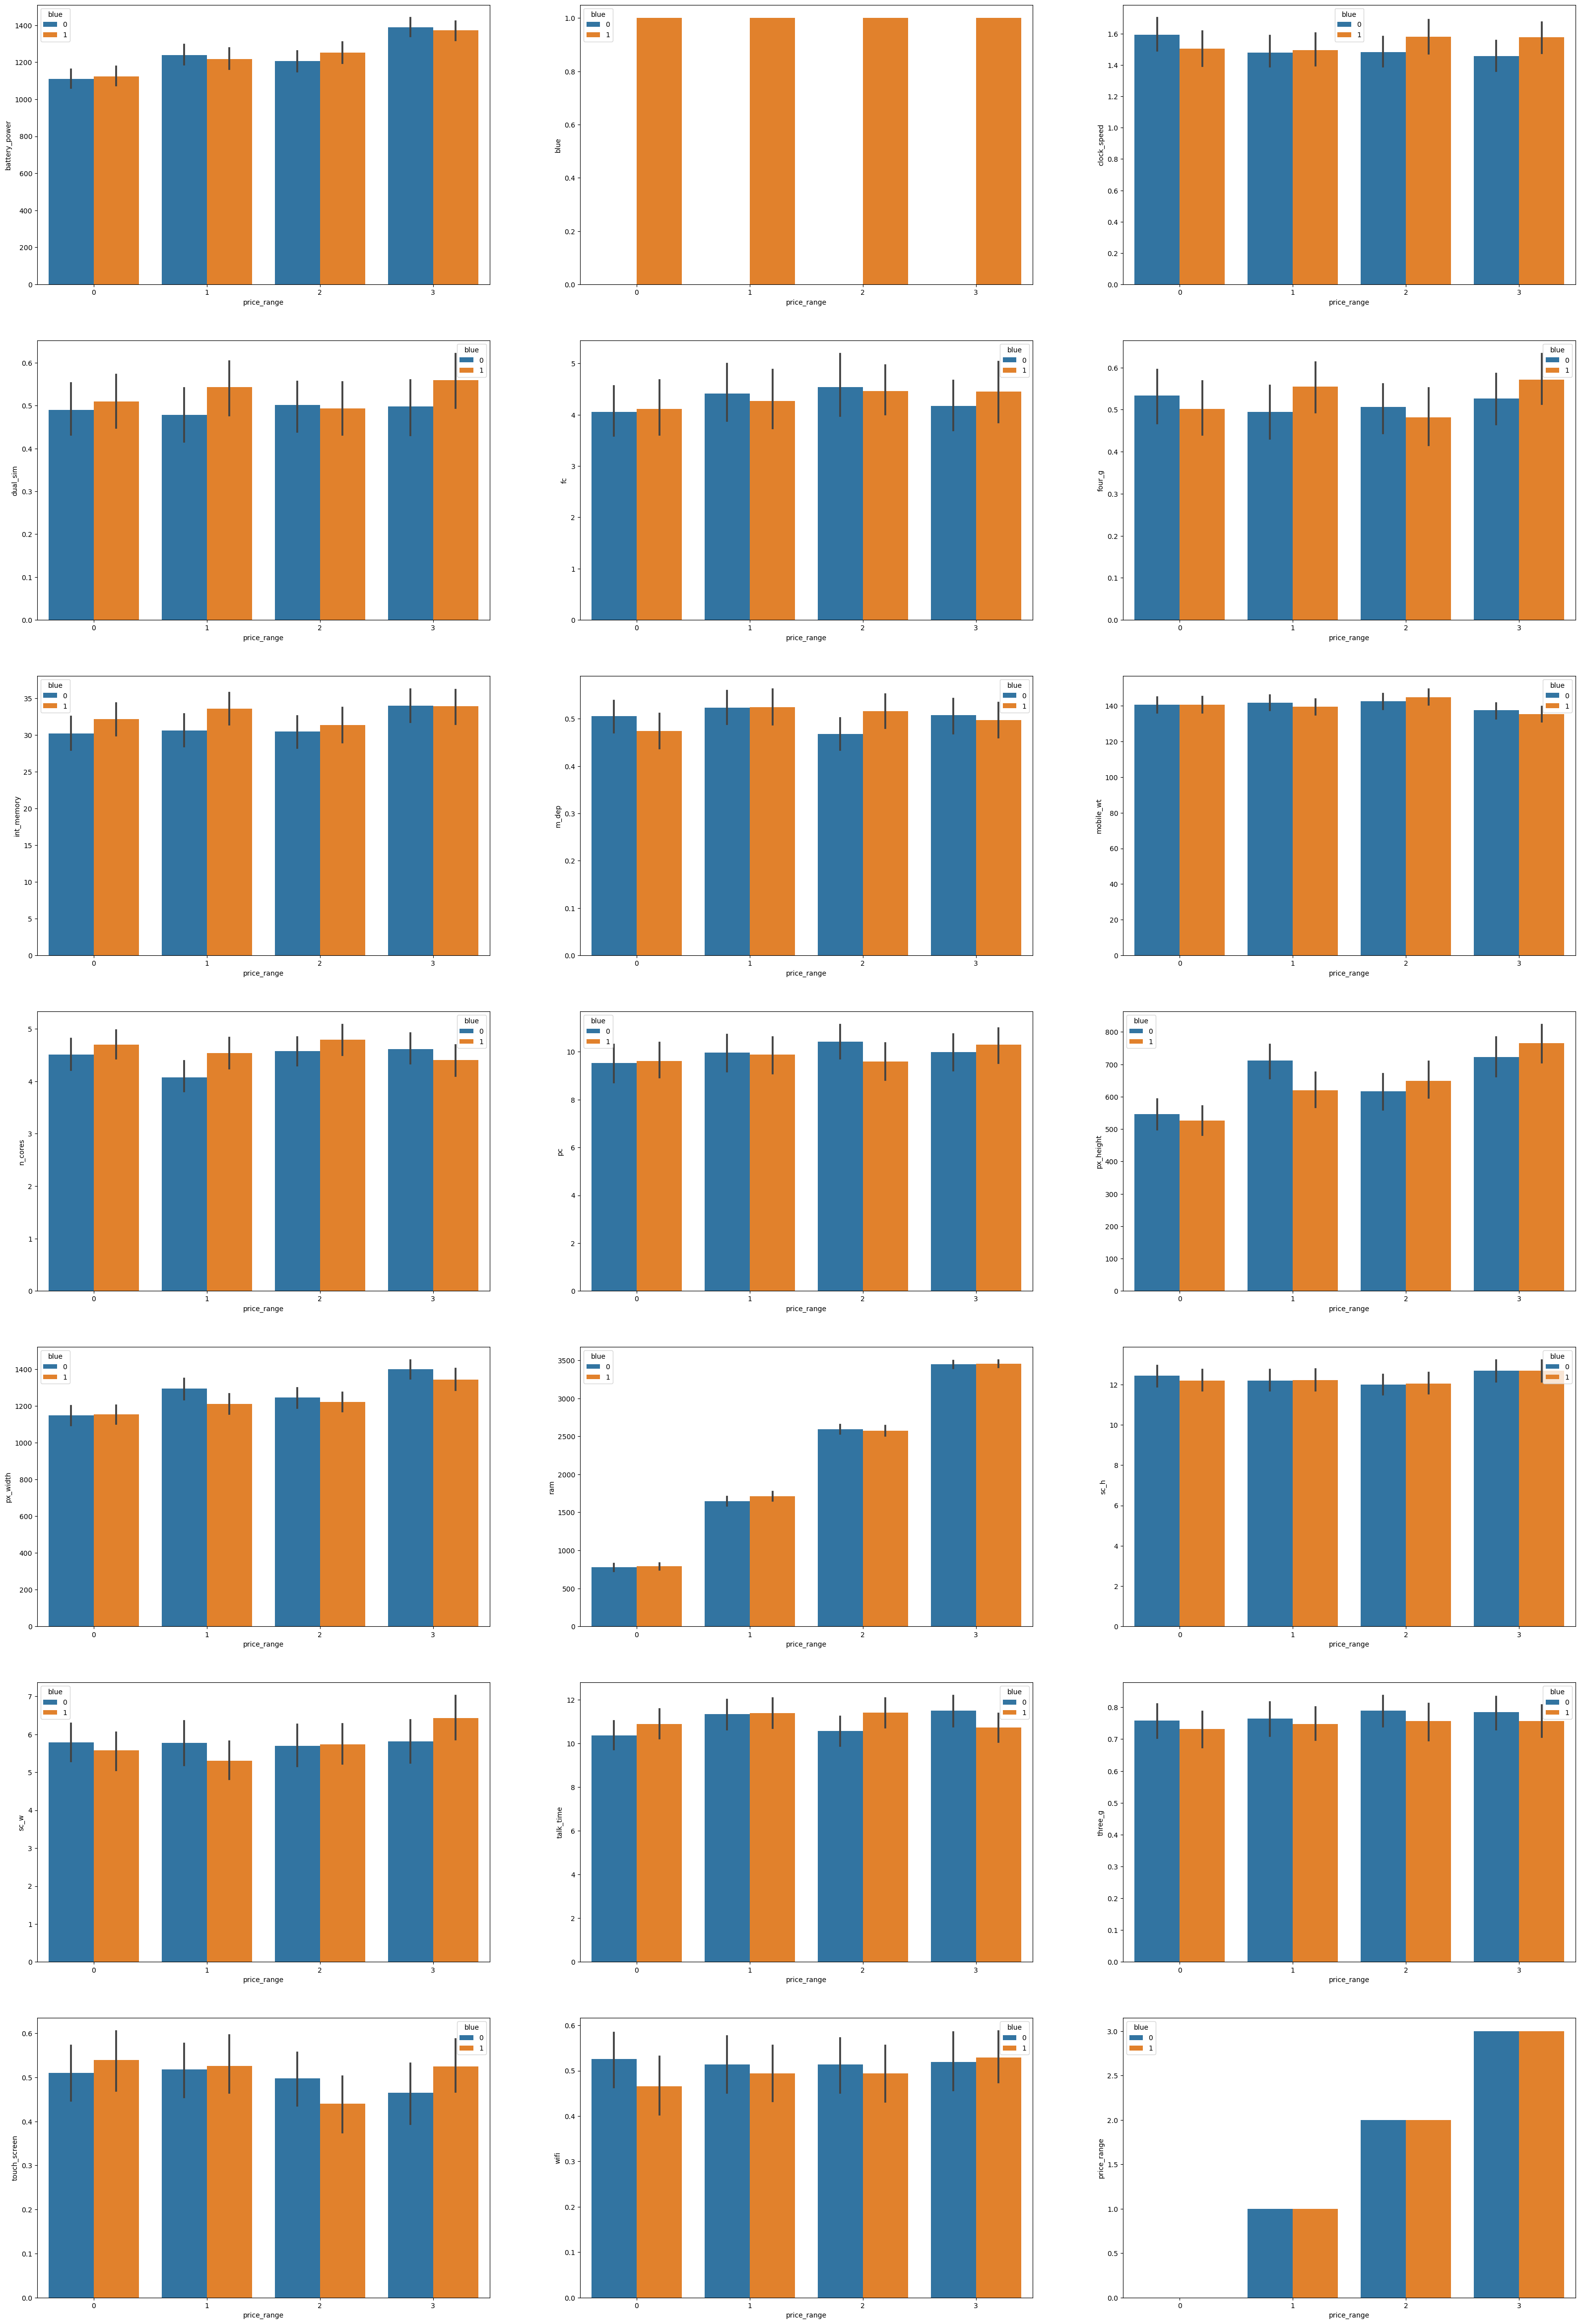

In [24]:
fig,axes=plt.subplots(nrows=7,ncols=3,figsize=(40,60))
for i, column in enumerate(df.columns):
    sns.barplot(x='price_range',y=column,hue='blue',data=df,ax=axes[i//3,i%3])

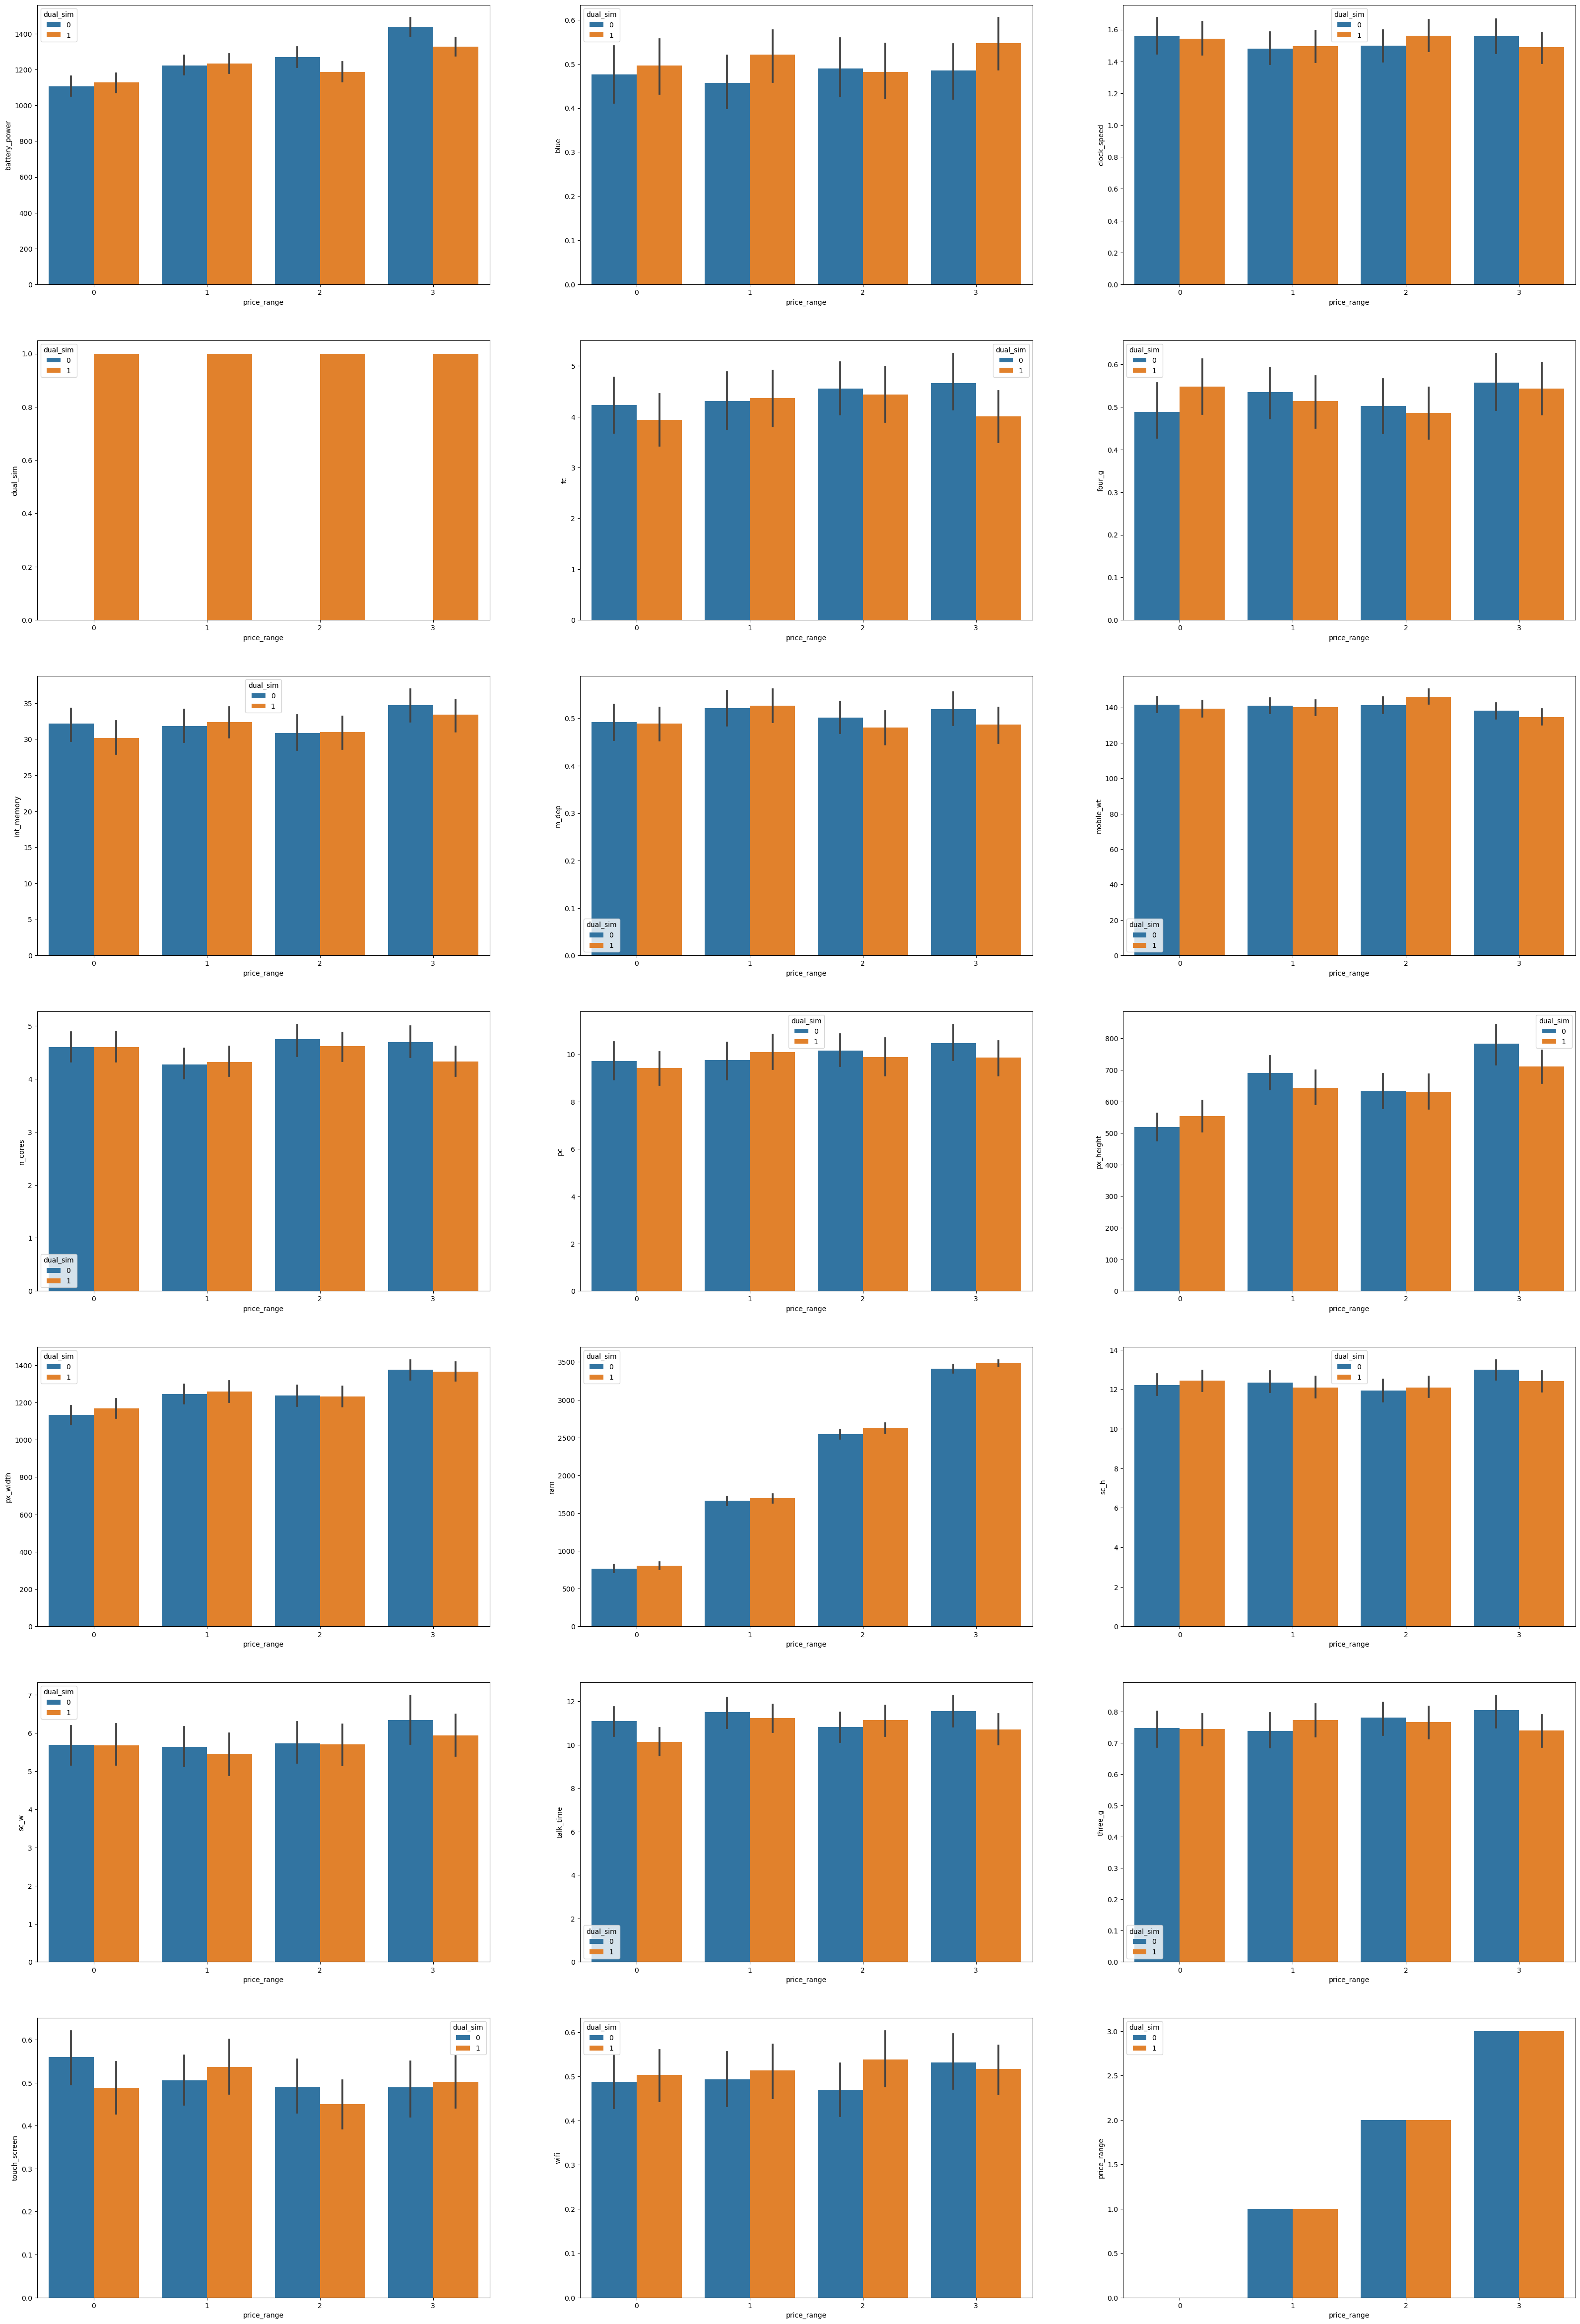

In [25]:
fig,axes=plt.subplots(nrows=7,ncols=3,figsize=(40,60))
for i, column in enumerate(df.columns):
    sns.barplot(x='price_range',y=column,hue='dual_sim',data=df,ax=axes[i//3,i%3])

## Observations:

##### - Each price range category has equal number of mobile phones having both supporting and non supporting specifications.
##### - There are very few mobiles in price range 0 and 1 with lesser number of cores.
##### - Most of the mpbiles in price range 2 and 3 are with high number of cores.
##### - Number of phones with less thickness is high and count of phones with high thickness is low.
##### - Count of mobiles with 3G and 4G is high in very high cost category.
##### - Count of mobiles with only 3G feature is high in high cost category.

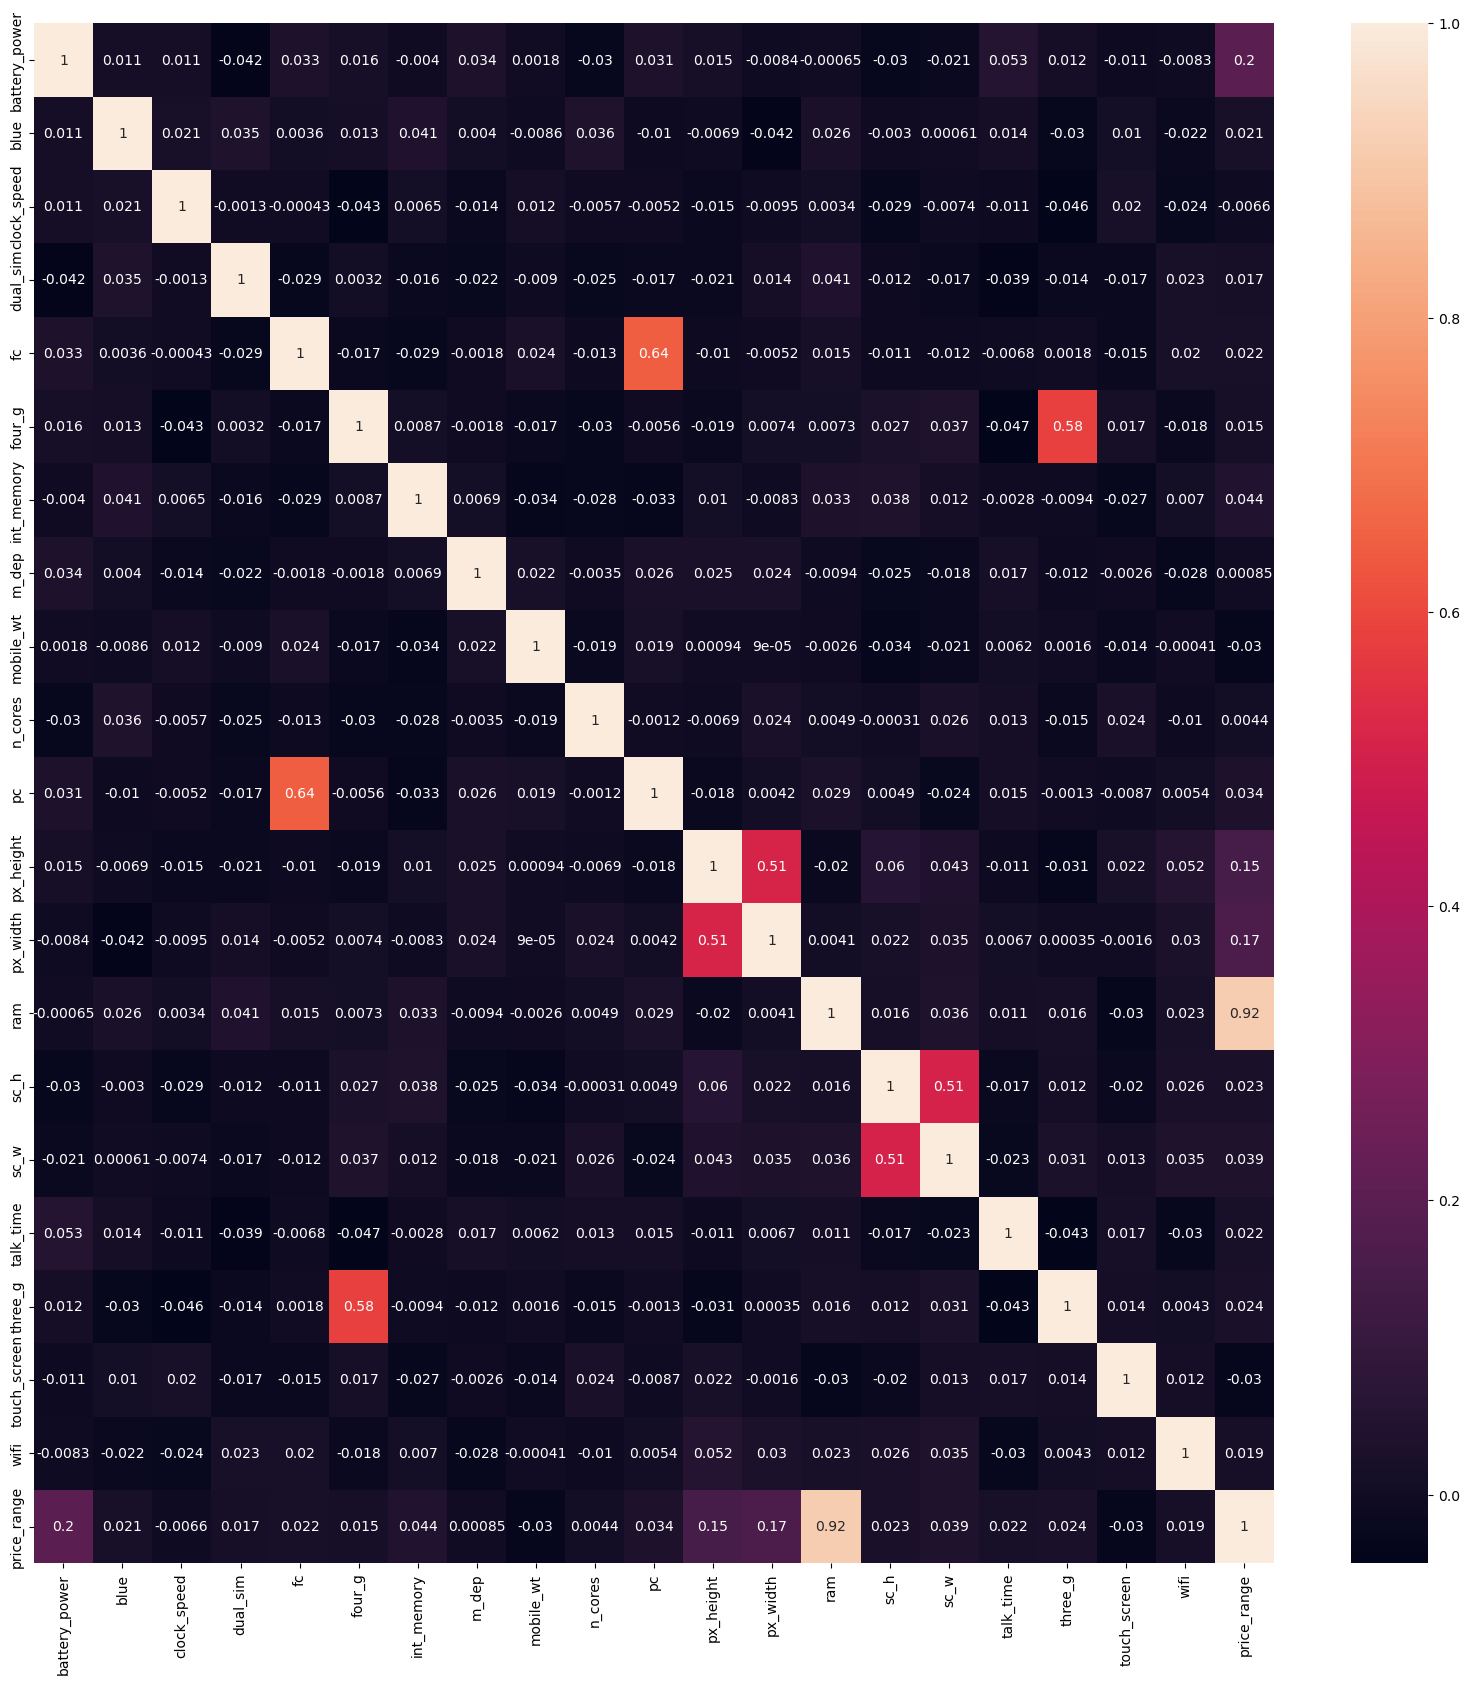

In [26]:
_, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, ax=ax);

In [27]:
df.corr()['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

## Observations:

##### - RAM has strong positive correlation with the price range and thus RAM increases price range also increases.
##### - Battery power also has positive correlation with the price range. Generally mobiles having high prices comes with good battery power.
##### - Also px_height and px_width are positively correlated. Generally high price range mobiles have good resolutions.
##### - Four_g ang Three_g are highly positively correlated. Now a days most of the smart mobiles has both type of options.
   ##### This could be the reason that they are correlated.
##### - Primary camera(pc) and front camera(fc) are positively correlated.
##### - sc_h and sc_w are positively correlated.

## Data Preprocessing

##### In our data all columns are in numerical values so we don't perform 'Encoding'.

### Outlier Handling

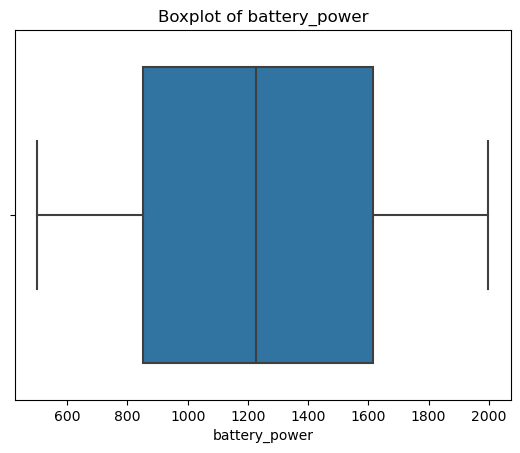

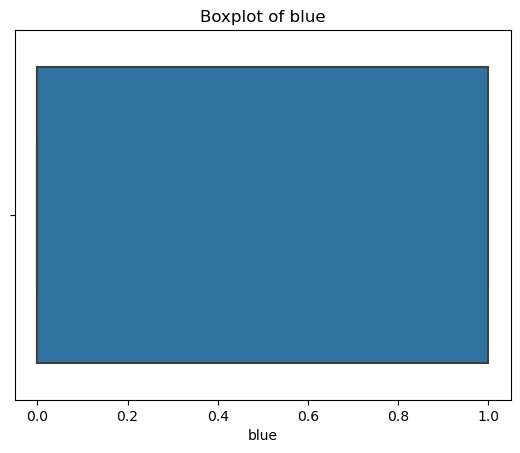

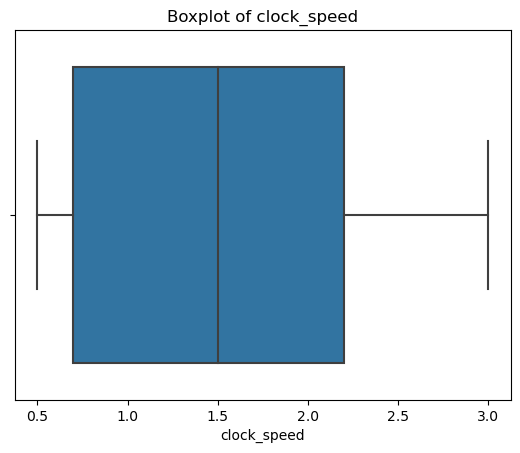

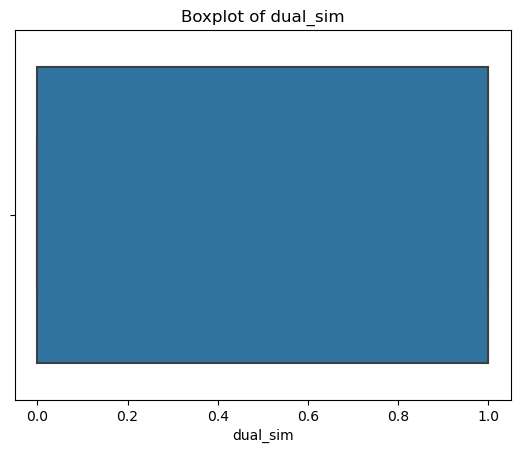

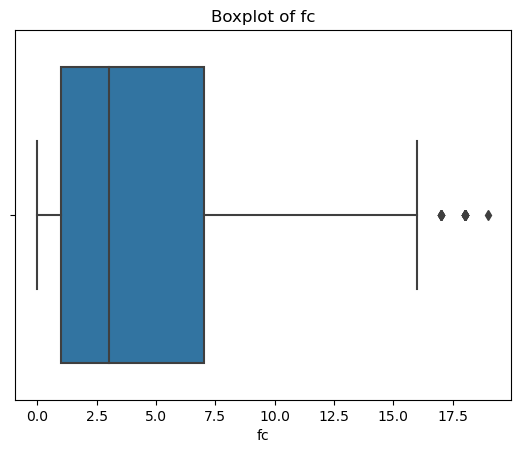

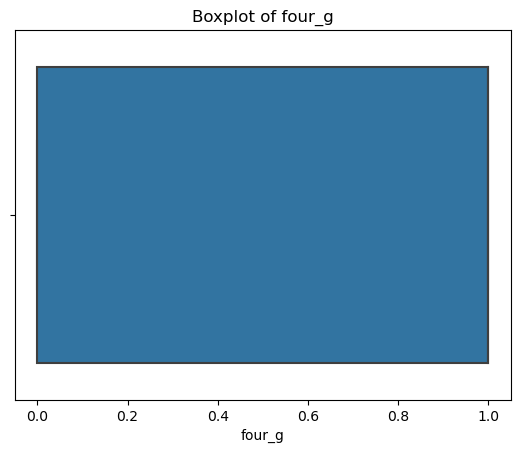

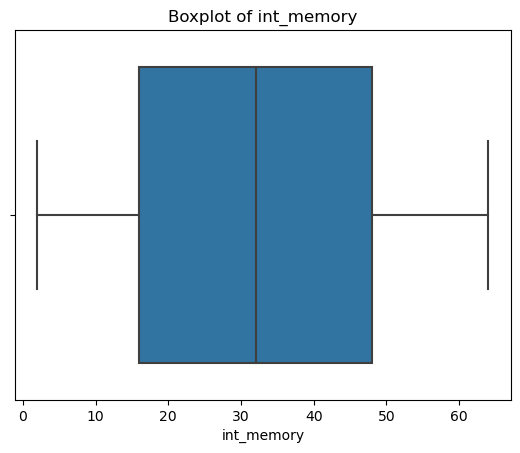

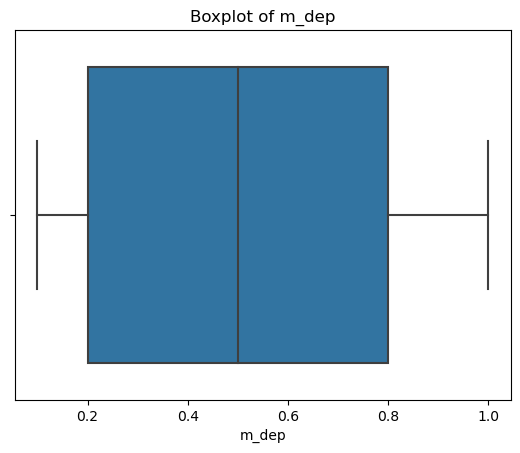

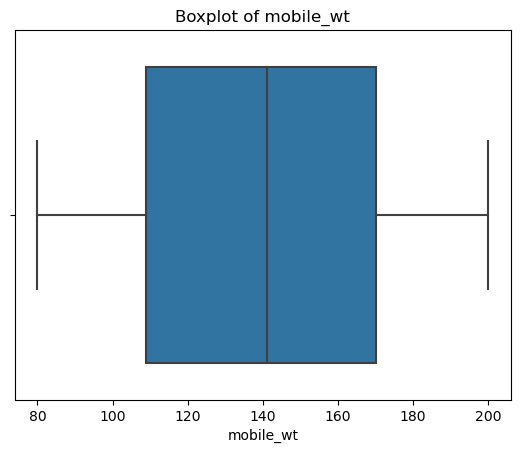

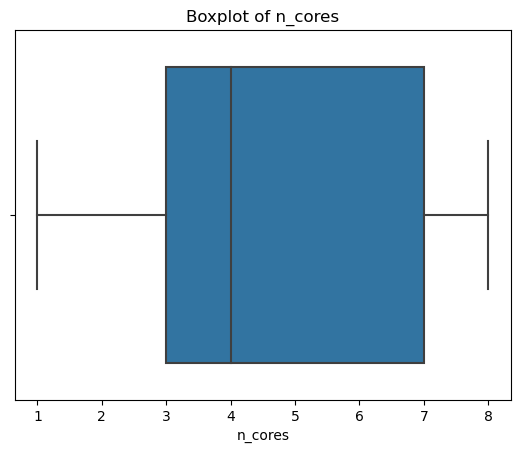

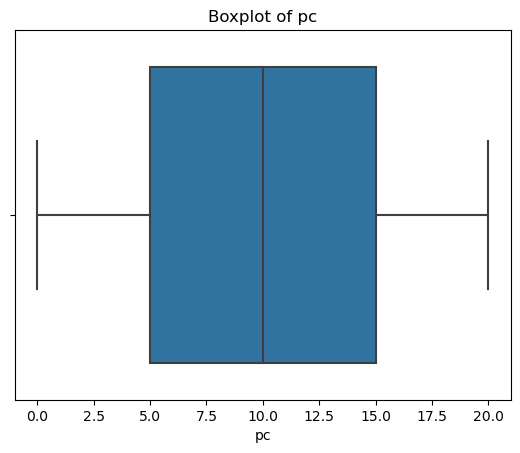

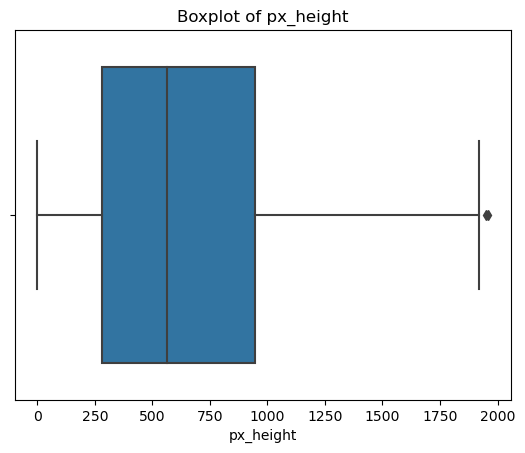

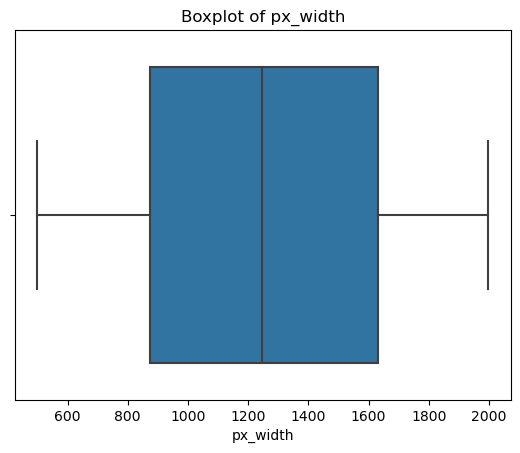

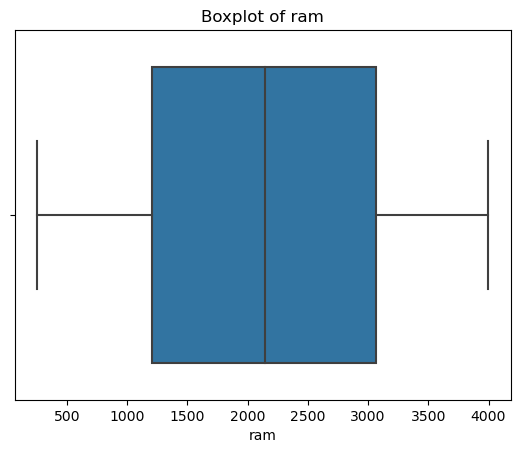

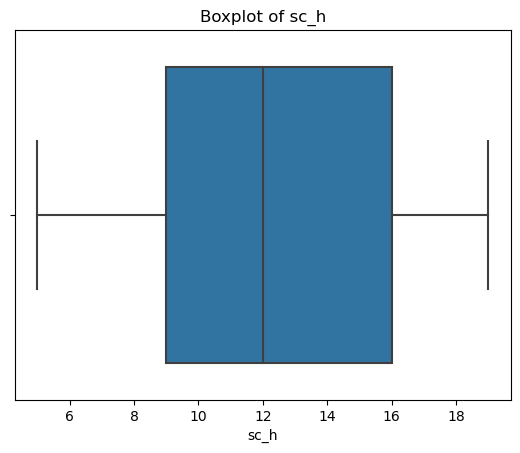

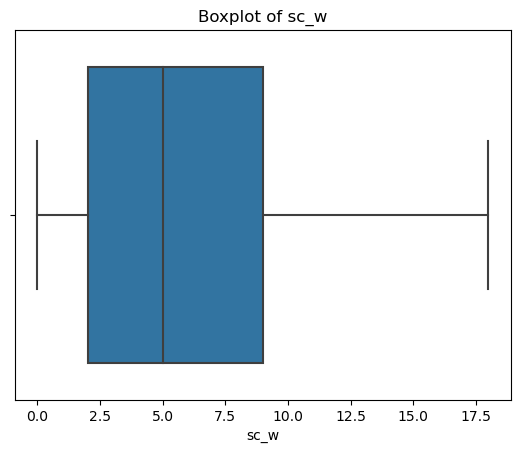

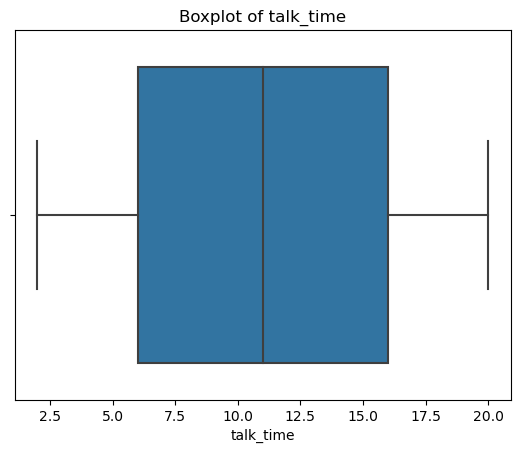

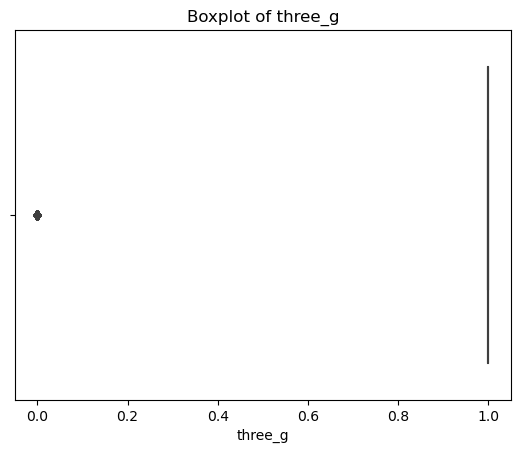

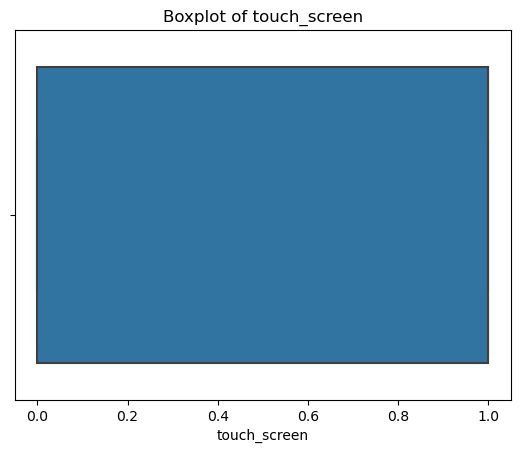

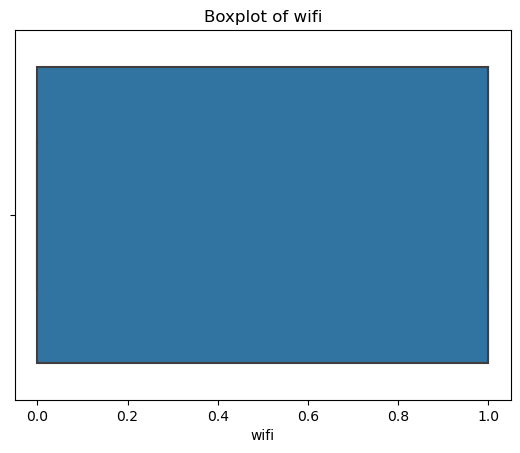

In [28]:
df_column = df.columns[~(df.columns=='price_range')]
for i in df_column:
    sns.boxplot(data=df,x=i)
    plt.title(f"Boxplot of {i}")
    plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [30]:
from scipy import stats

In [31]:
IQR_fc = stats.iqr(df.fc)

In [32]:
IQR_fc

6.0

In [33]:
Q1_fc = np.percentile(df.fc,25)
Q3_fc = np.percentile(df.fc,75)

In [34]:
LB_fc = Q1_fc -1.5*IQR_fc
UB_fc = Q3_fc + 1.5*IQR_fc

In [35]:
df.loc[df.fc>UB_fc,'fc']

95      18
169     17
226     18
229     17
300     17
305     18
372     17
584     17
1387    18
1406    18
1416    18
1549    17
1554    18
1693    18
1705    19
1880    18
1882    18
1888    18
Name: fc, dtype: int64

In [36]:
df.loc[df.fc<LB_fc,'fc']

Series([], Name: fc, dtype: int64)

In [37]:
df[(df.fc>LB_fc)&(df.fc<UB_fc)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [38]:
((2000-1958)/2000)*100

2.1

In [39]:
df.fc.mean()

4.3095

There is outliers in fc(front camera megapixel) column but I don't remove it since there are possibilities that phones have
higher megapixel.

### Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scale = StandardScaler()
df[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]=scale.fit_transform(df[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']])

In [42]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,1,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,0,2
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,0,2
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0,2
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,1,0,1


## Split Data

In [43]:
X = df[df.columns.difference(['price_range'])]
y = df['price_range']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
y_train

0       1
816     0
790     0
361     0
592     1
       ..
1791    0
1096    3
1932    1
235     0
1061    1
Name: price_range, Length: 1600, dtype: int64

In [46]:
X_train.shape

(1600, 20)

In [47]:
X_test.shape

(400, 20)

In [48]:
y_train.shape

(1600,)

In [49]:
y_test.shape

(400,)

## Model Creation

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression()
l_model.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred = l_model.predict(X_test)
y_train_pred = l_model.predict(X_train)

In [52]:
## Testing accuracy
accuracy = accuracy_score(y_pred = y_pred,y_true = y_test)
print(f'Accuracy of the model Logistic Regression is {accuracy*100:.2f}%')

Accuracy of the model Logistic Regression is 96.00%


In [53]:
## Training accuracy
accuracy_score(y_train,y_train_pred)

0.978125

In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        94
           1       0.96      0.93      0.94        99
           2       0.93      0.95      0.94       104
           3       0.96      0.99      0.98       103

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



[[ 91   1   0   0]
 [  3  92   1   0]
 [  0   6  99   1]
 [  0   0   4 102]]


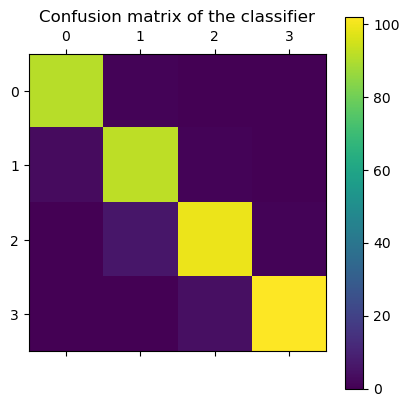

In [55]:
from sklearn.metrics import confusion_matrix
import pylab as pl
print(confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

## Decision Tree Classifier

In [56]:
dc_model = DecisionTreeClassifier(max_depth=9)
dc_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [57]:
## Testing accuracy
dc_predictions = dc_model.predict(X_test)
accuracy_score(dc_predictions,y_test)


0.8475

In [58]:
## Training accuracy
dc_train_pred = dc_model.predict(X_train)
accuracy_score(dc_train_pred,y_train)

0.99375

In [59]:
print(classification_report(dc_predictions,y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        91
           1       0.86      0.76      0.81       109
           2       0.77      0.79      0.78       104
           3       0.85      0.94      0.89        96

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [60]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
   
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(8,5))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')
     

#### Feature Importance

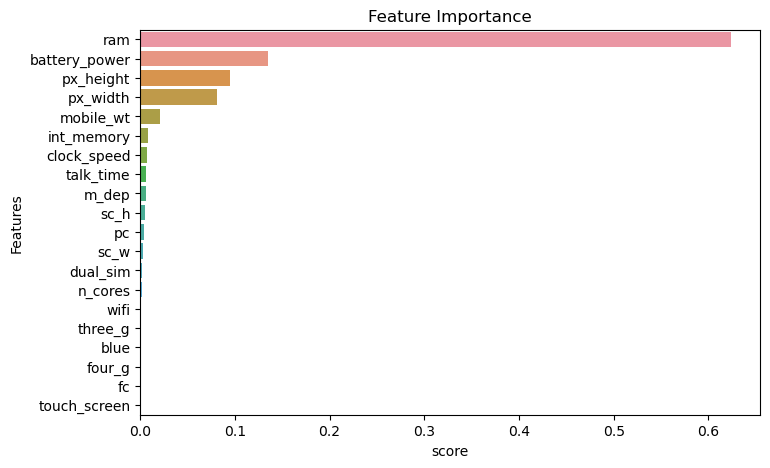

In [61]:
plot_feature_importance((dc_model))

## Random Forest Classifier

In [62]:
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
## Testing accuracy
rfc_predictions = rfc_model.predict(X_test)
rfc_accuracy = accuracy_score(y_pred=rfc_predictions,y_true=y_test)
print(f'Accuracy of the Random Forest Classifier model is  {rfc_accuracy*100:.2f}%')

Accuracy of the Random Forest Classifier model is  85.25%


In [64]:
## Training accuracy
rfc_train_pred = rfc_model.predict(X_train)
accuracy_score(y_train,rfc_train_pred)

1.0

In [65]:
print(classification_report(rfc_predictions,y_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        96
           1       0.80      0.77      0.79       100
           2       0.83      0.79      0.81       111
           3       0.86      0.98      0.91        93

    accuracy                           0.85       400
   macro avg       0.85      0.86      0.85       400
weighted avg       0.85      0.85      0.85       400



#### Feature Importance

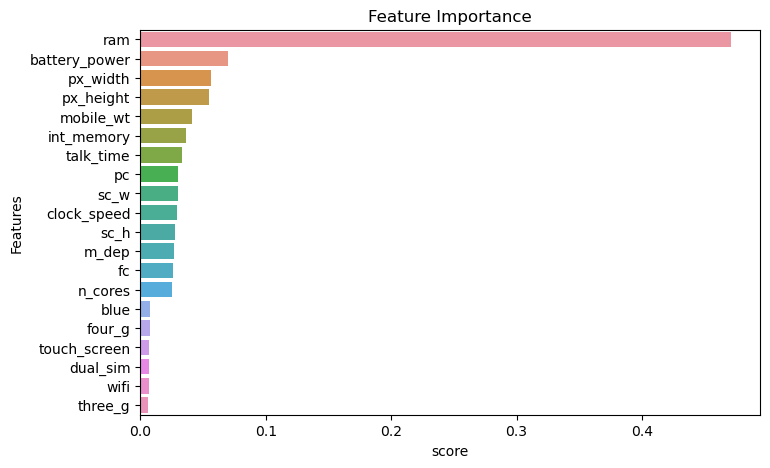

In [66]:
plot_feature_importance((rfc_model))

## Support Vector Classifier (SVC)

In [67]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [68]:
## Testing accuracy
svc_predictions = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_pred = svc_predictions,y_true = y_test)
print(f'Accuracy of the SVC model is {svc_accuracy*100:.2f}%')

Accuracy of the SVC model is 90.75%


In [69]:
## Training accuracy
svc_train_pred = svc_model.predict(X_train)
accuracy_score(y_train,svc_train_pred)

0.98375

In [70]:
print(classification_report(svc_predictions,y_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        90
           1       0.93      0.83      0.88       107
           2       0.87      0.88      0.87       105
           3       0.91      0.98      0.94        98

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



## Linear SVC

In [71]:
lsvc_model = SVC(kernel='linear',C=1.0, probability=True,random_state=0)
lsvc_model.fit(X_train,y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [72]:
## Testing accuracy
lsvc_predictions = lsvc_model.predict(X_test)
lsvc_accuracy = accuracy_score(y_pred = lsvc_predictions,y_true = y_test)
print(f'Accuracy of the Linear SVC model is {lsvc_accuracy*100:.2f}%')

Accuracy of the Linear SVC model is 96.00%


In [73]:
## Training accuracy
lsvc_train_pred = lsvc_model.predict(X_train)
accuracy_score(y_train,lsvc_train_pred)

0.9775

In [74]:
print(classification_report(lsvc_predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        94
           1       0.94      0.95      0.94        95
           2       0.94      0.93      0.93       108
           3       0.96      0.99      0.98       103

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



## Gradient Boosting Classifier

In [75]:
gb_model = GradientBoostingClassifier(n_estimators=100,random_state=0)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [76]:
## Testing accuracy
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_pred= gb_predictions,y_true = y_test)
print(f'Accuracy of the Gradient Boosting Classifier model is {gb_accuracy*100:.2f}%')

Accuracy of the Gradient Boosting Classifier model is 88.50%


In [77]:
## Training accuracy
gb_train_pred = gb_model.predict(X_train)
accuracy_score(y_train,gb_train_pred)

0.999375

In [78]:
print(classification_report(gb_predictions,y_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        89
           1       0.90      0.81      0.85       106
           2       0.81      0.85      0.83       101
           3       0.92      0.93      0.92       104

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.88       400



#### Feature Importance

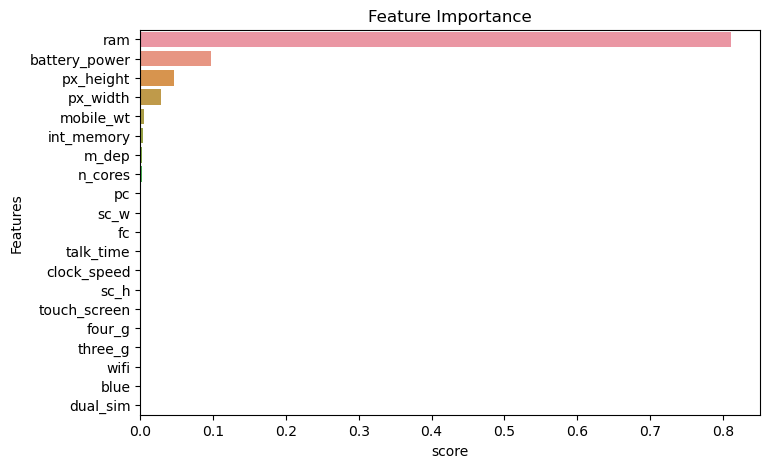

In [79]:
plot_feature_importance((gb_model))

## KNN

In [80]:
kn_model= KNeighborsClassifier()
kn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
## Testing accuracy
kn_y_pred = kn_model.predict(X_test)
kn_accuracy = accuracy_score(y_pred = kn_y_pred,y_true=y_test)
print(f'Accuracy of the KNN model is {kn_accuracy*100:.2f}%')

Accuracy of the KNN model is 58.00%


In [82]:
## Training accuracy
kn_train_pred = kn_model.predict(X_train)
accuracy_score(y_train,kn_train_pred)

0.771875

In [83]:
print(classification_report(kn_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       104
           1       0.46      0.39      0.42       112
           2       0.46      0.49      0.48        99
           3       0.67      0.84      0.74        85

    accuracy                           0.58       400
   macro avg       0.58      0.59      0.58       400
weighted avg       0.58      0.58      0.58       400



## AdaBoost Classifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier
a_model = AdaBoostClassifier(n_estimators=600) 
a_model.fit(X_train,y_train) 

AdaBoostClassifier(n_estimators=600)

In [85]:
## Testing accuracy
ada_ypred = a_model.predict(X_test)
a_accuracy = accuracy_score(y_pred = ada_ypred,y_true=y_test)
print(f'Accuracy of the AdaBoost Classifier model is {a_accuracy*100:.2f}%') 

Accuracy of the AdaBoost Classifier model is 78.75%


In [86]:
## Training accuracy
ada_train_pred = a_model.predict(X_train)
accuracy_score(y_train,ada_train_pred)

0.781875

In [87]:
print(classification_report(ada_ypred,y_test)) 

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        83
           1       0.77      0.71      0.74       104
           2       0.74      0.74      0.74       106
           3       0.85      0.84      0.85       107

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



#### Feature Importance

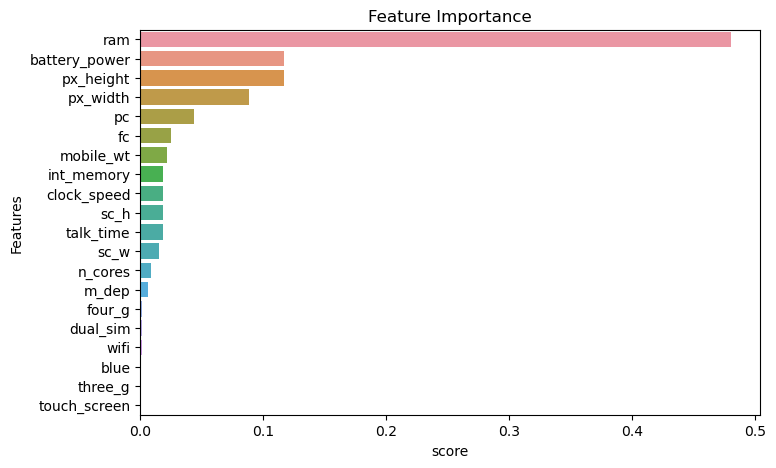

In [88]:
plot_feature_importance((a_model))

## XG Boost Classifier

In [89]:
from xgboost import XGBClassifier
x_model = XGBClassifier()
x_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [90]:
## Testing accuracy
x_ypred = x_model.predict(X_test)
x_accuracy = accuracy_score(y_pred = x_ypred,y_true=y_test)
print(f'Accuracy of the XGBoost Classifier model is {x_accuracy*100:.2f}%') 

Accuracy of the XGBoost Classifier model is 89.75%


In [91]:
## Training accuracy
x_train_pred = x_model.predict(X_train)
accuracy_score(y_train,x_train_pred)

1.0

In [92]:
print(classification_report(x_ypred,y_test)) 

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        86
           1       0.93      0.81      0.86       110
           2       0.84      0.88      0.86       101
           3       0.92      0.95      0.94       103

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



#### Feature Importance

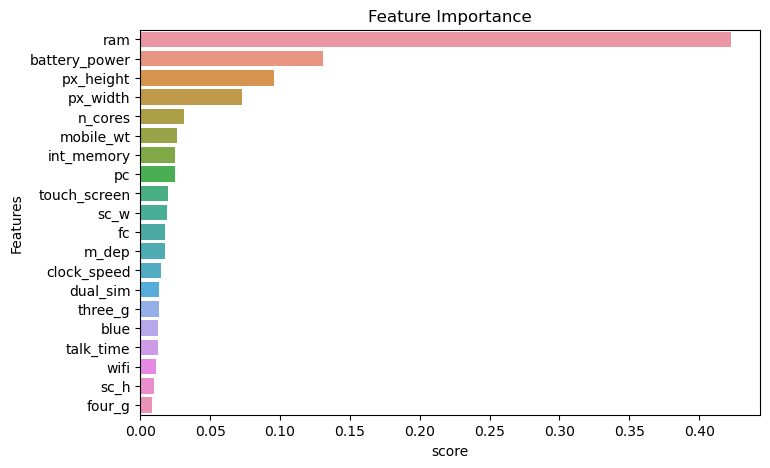

In [93]:
plot_feature_importance((x_model))

# Evaluation of models

|S.No.| Algorithms |    Accuracy Score of testing |Accuracy Score of training |    | Precision | Recall | f1-score | Support |
|-----|-------|----------------|----|-----------|--------|----------|---------|-----------|
|1|Logistic Regression|96.0%|97.81%    |0| 0.99 | 0.97 | 0.98 | 94 |
| |                  |     |     |1| 0.96 | 0.93 | 0.94 | 99 |
| |                  |     |     |2| 0.93 | 0.95 | 0.94 | 104 |
| |                  |     |     |3| 0.96 | 0.99 | 0.98 | 103 |
|2|Decision Tree Classifier|84.75%|99.37%    |0|0.91|0.92|0.92|91|
| |                       |     |     |1|0.86|0.76|0.81|109|
| |                       |     |     |2|0.77|0.79|0.78|104|
| |                       |     |     |3|0.85|0.94|0.89|96|
|3|Random Forest Classifier|85.25%|100%    |0|0.92|0.89|0.90|96|
| |                       |     |     |1|0.80|0.77|0.79|100|
| |                      |     |      |2|0.83|0.79|0.81|111|
| |                       |    |      |3|0.86|0.98|0.91|93|
|4|Support Vector Classifier(SVC)|90.75%|98.37%   |0|0.93|0.96|0.95|90|
| |                             |      |    |1|0.93|0.83|0.88|107|
| |                             |      |    |2|0.87|0.88|0.87|105|
| |                             |      |    |3|0.91|0.98|0.94|98|
|5|Linear SVC                   | 96.0%| 97.75%   |0|1.00|0.98|0.99|94|
| |                             |     |     |1|0.94|0.95|0.94|95|
| |                             |     |     |2|0.94|0.93|0.93|108|
| |                             |     |     |3|0.96|0.99|0.98|103|
|6|Gradient Boosting Classifier|88.50%| 99.93%  |0|0.92|0.96|0.94|89|
| |                           |      |     |1|0.90|0.81|0.85|106|
| |                           |      |     |2|0.81|0.85|0.83|101|
| |                           |      |     |3|0.92|0.93|0.92|104|
|7|K-Nearest Neighbours(KNN)| 58.0% |77.18%      |0|0.74|0.65|0.69|104|
| |                        |       |       |1|0.46|0.39|0.42|112|
| |                        |       |       |2|0.46|0.49|0.48|99|
| |                        |       |       |3|0.67|0.84|0.74|85|
|8|AdaBoost Classifier|78.75%| 78.18%    |0|0.79|0.88|0.83|83|
| |                  |      |      |1|0.77|0.71|0.74|104|
| |                  |      |      |2|0.74|0.74|0.74|106|
| |                  |      |      |3|0.85|0.84|0.85|107|
|9|XG Boost Classifier|89.75%| 100%    |0|0.90|0.97|0.93|86|
| |                 |       |      |1|0.93|0.81|0.86|110|
| |                 |       |      |2|0.84|0.88|0.86|101|
| |                 |       |      |3|0.92|0.95|0.94|103|

## Data Analysis Report

I completed this job using the steps listed below.

#### 1.Introduction of the Data
#### 2.Objective of the model
#### 3.Loading and Read the data
#### 4.Exploratory Data Analysis (EDA)
  (a) Univariate Analysis:
        We used distplot and countplot.
        
  (b) Bivariate and Multivariate Analysis:
        We used barplot and heatmap.
#### 5.Data Preprocessing
   (a) Outlier Handling:
        IQR Method: Used to identify and remove outliers in numerical features.
        
   (b) Scaling:
           Applied StandardScaler to normalize the numerical features, ensuring they have a mean of 0 and 
           a standard deviation of 1.
#### 6.Split Data
   We split 80% of data for training and 20% of data for testing.
#### 7.Model Creation
      Models used : 
              Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Support Vector Classifier(SVC), 
              Linear SVC, Gradient Boosting Classifier, K-Nearest Neighbours(KNN), AdaBoost Classifier, XG Boost Classifier.
              
      We check accuracy scores of training and testing data in each model.
   
      We also plot feature importance of every model.
#### 8.Evaluation of models
  We create a table based on above performance of each model.
    
    


### Model Comparison Report

- As seen in above Logistic Regression and Linear SVC have same and highest testing accuracy scores.
- Support Vector Classifier (SVC) can be considered as the second most good model.
- KNN performed very worst.

### Challenges Faced

Certain challenges with data interpretation in EDA techniques as well.

## Conclusion and Suggestions

From the data, we can conclude that battery power, RAM, resolution,weight, px_height and px_width affect the price range the most.
Since the model accuracy is 96%, it did a great job of discovering the pattern and relationship between each element and the
price.

My suggestion is; it will be much easier for Bob to segment his customers for the next step to target them accordingly. 

For instance:

Some people highly consider RAM, resolution, memory, and battery power, such as gamers, which are fulfilled by price range 3.
Bob can invest in those elements to make specific phone series to appeal to this group of customers.
There are also people who look for the best phones based on their specifications without belonging to any specific group 
(such as gamers) and they can also be enticed by the fact that it is lightweight. Price Range 3 offers a complete package.
Interestingly, lower price ranges have a better front camera and primary camera megapixels. This can attract customers who 
buy phones because of the camera, for example, content creators, photographers, or just casually like photography and videography 
in general.
Besides camera quality, lower price ranges also have decent internal memory (don't have that much difference with the most 
expensive phones) and screen resolution. This will be worth the price for budget-conscious customers.
From the data, Bob's company can strategically market its mobile phones based on the features that are most competitive
in each price range. For example, for high-end phones, marketing campaigns can highlight RAM, internal memory, and screen
quality, while lower-priced phones can excel in terms of camera megapixels.

We checked for the feature importance's of each model. RAM, Battery Power, px_height and px_weight contributed the most while
predicting the price range of the mobile.